# Import libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.utils.vis_utils import plot_model
from sklearn.model_selection import train_test_split


2022-12-31 17:06:16.080607: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import scipy.io as sio
import os
import numpy as np
import matplotlib.pyplot as plt

## Load cumulative data and train neural network on the combined normalized decorrelation data

In [3]:
cpath = os.getcwd()
path = '/mat files/cumPredictorsTempsAt4Points14Exps.mat'
all_data = sio.loadmat(cpath + path)

In [4]:
all_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'cumAltDecAt4points', 'cumDecAt4points', 'cumIBSnormAt4points', 'simpleCumDecAt4points', 'temperatureAt4Points'])

In [5]:
cum_dec_4points = all_data['cumDecAt4points']
cum_dec_global_4points = all_data['cumAltDecAt4points']
cum_dec_local_4points = all_data['simpleCumDecAt4points']
cum_IBS_4points = all_data['cumIBSnormAt4points']
temperature_4points = all_data['temperatureAt4Points']

In [6]:
cum_dec_4points.shape

(14, 4, 60)

In [7]:
cum_dec_vec = cum_dec_4points.ravel()
cum_dec_global_vec = cum_dec_global_4points.ravel()
cum_dec_local_vec = cum_dec_local_4points.ravel()
IBS_vec = cum_IBS_4points.ravel()
temperature_vec = temperature_4points.ravel()

/var/folders/mq/2m2rd5h112v8vr5mhrwbt3l80000gn/T/ipykernel_15925/1436322830.py:23: RuntimeWarning: divide by zero encountered in log10
  plt.hist(np.log10(cum_dec_vec), range=[-10,2]);
/var/folders/mq/2m2rd5h112v8vr5mhrwbt3l80000gn/T/ipykernel_15925/1436322830.py:27: RuntimeWarning: divide by zero encountered in log10
  plt.hist(np.log10(cum_dec_global_vec), range=[-10,2]);
/var/folders/mq/2m2rd5h112v8vr5mhrwbt3l80000gn/T/ipykernel_15925/1436322830.py:31: RuntimeWarning: divide by zero encountered in log10
  plt.hist(np.log10(cum_dec_local_vec), range=[-10,2]);
/var/folders/mq/2m2rd5h112v8vr5mhrwbt3l80000gn/T/ipykernel_15925/1436322830.py:35: RuntimeWarning: divide by zero encountered in log10
  plt.hist(np.log10(IBS_vec), range=[-10,6]);


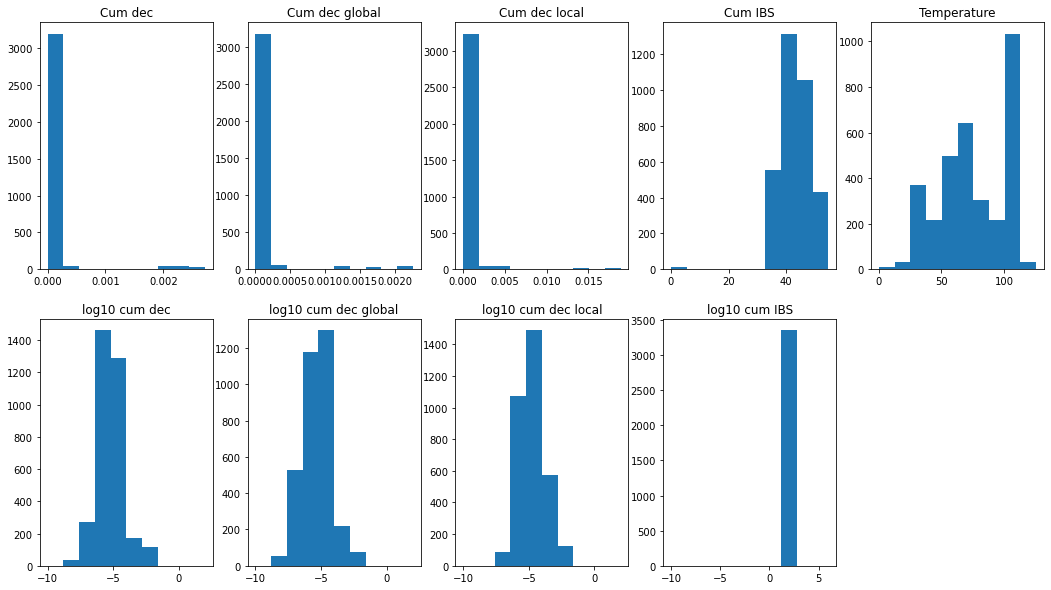

In [284]:
plt.figure(figsize=(18,10))
plt.subplot(2,5,1)
plt.hist(cum_dec_vec);
plt.title('Cum dec')

plt.subplot(2,5,2)
plt.hist(cum_dec_global_vec);
plt.title('Cum dec global')

plt.subplot(2,5,3)
plt.hist(cum_dec_local_vec);
plt.title('Cum dec local')

plt.subplot(2,5,4)
plt.hist(IBS_vec);
plt.title('Cum IBS')

plt.subplot(2,5,5)
plt.hist(temperature_vec);
plt.title('Temperature')

plt.subplot(2,5,6)
plt.hist(np.log10(cum_dec_vec), range=[-10,2]);
plt.title('log10 cum dec')

plt.subplot(2,5,7)
plt.hist(np.log10(cum_dec_global_vec), range=[-10,2]);
plt.title('log10 cum dec global')

plt.subplot(2,5,8)
plt.hist(np.log10(cum_dec_local_vec), range=[-10,2]);
plt.title('log10 cum dec local')

plt.subplot(2,5,9)
plt.hist(np.log10(IBS_vec), range=[-10,6]);
plt.title('log10 cum IBS');


### Clean and normalize the data

In [9]:
cum_dec_4points.shape

(14, 4, 60)

In [10]:
cum_dec_4points = np.transpose(cum_dec_4points,[0,2,1])
temperature_4points = np.transpose(temperature_4points,[0,2,1])

cum_dec_4points.shape

(14, 60, 4)

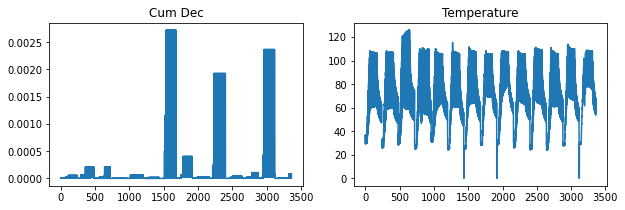

In [11]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(cum_dec_4points.ravel())
plt.title('Cum Dec');
plt.subplot(1,2,2)
plt.plot(temperature_4points.ravel())
plt.title('Temperature');

In [12]:
cum_dec_4points_vec = cum_dec_4points.reshape([14*60,4])
temperature_4points_vec = temperature_4points.reshape([14*60,4])
cum_dec_4points_vec.shape

(840, 4)

In [13]:
# Remove nans
cum_dec_4points_vec = cum_dec_4points_vec[~np.isnan(temperature_4points_vec)].reshape([-1,4])
temperature_4points_vec = temperature_4points_vec[~np.isnan(temperature_4points_vec)].reshape([-1,4])

In [14]:
cum_dec_4points_vec.shape

(839, 4)

/var/folders/mq/2m2rd5h112v8vr5mhrwbt3l80000gn/T/ipykernel_15925/2778154624.py:7: RuntimeWarning: divide by zero encountered in log10
  plt.hist(np.log10(cum_dec_4points_vec),range=[-30,30]);


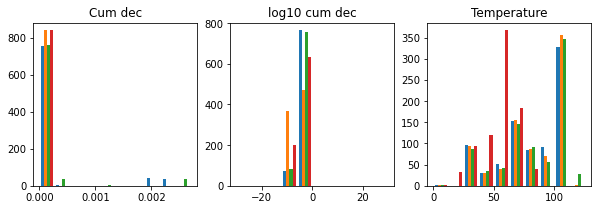

In [15]:
plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plt.hist(cum_dec_4points_vec);
plt.title('Cum dec');

plt.subplot(1,3,2)
plt.hist(np.log10(cum_dec_4points_vec),range=[-30,30]);
plt.title('log10 cum dec');

plt.subplot(1,3,3)
plt.hist(temperature_4points_vec);
plt.title('Temperature');

In [143]:
cum_dec_log10 = np.log10(cum_dec_4points_vec)
cum_dec_log10 = np.nan_to_num(cum_dec_log10,posinf=0, neginf=-10)
cum_dec_log10 = cum_dec_log10 / abs(cum_dec_log10).max()
cum_dec_log10 = cum_dec_log10 - np.mean(cum_dec_log10)

/var/folders/mq/2m2rd5h112v8vr5mhrwbt3l80000gn/T/ipykernel_15925/221398474.py:1: RuntimeWarning: divide by zero encountered in log10
  cum_dec_log10 = np.log10(cum_dec_4points_vec)


In [146]:
cum_dec_log10.min()

-0.4765312028155805

(array([[  3.,   0.,   0.,  14.,  43.,  39., 357., 219.,  82.,  82.],
        [  3.,   1.,  13.,  26., 172., 387.,  68., 169.,   0.,   0.],
        [  3.,   0.,   2.,   6.,  41., 130., 253., 275.,  86.,  43.],
        [  3.,   0.,   8.,  22.,  89., 277., 273., 143.,  24.,   0.]]),
 array([-0.4765312 , -0.40218824, -0.32784529, -0.25350233, -0.17915937,
        -0.10481641, -0.03047345,  0.0438695 ,  0.11821246,  0.19255542,
         0.26689838]),
 <a list of 4 BarContainer objects>)

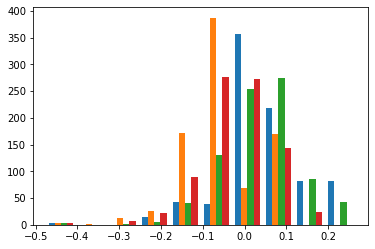

In [148]:
plt.hist(cum_dec_log10);

In [150]:
temperature_norm = temperature_4points_vec / temperature_4points_vec.max()
temperature_norm = temperature_norm - temperature_norm.mean()
temperature_norm.min()

-0.5962808822108233

In [172]:
temp_max = temperature_4points_vec.max()

In [173]:
temp_norm_mean = temperature_norm.mean()

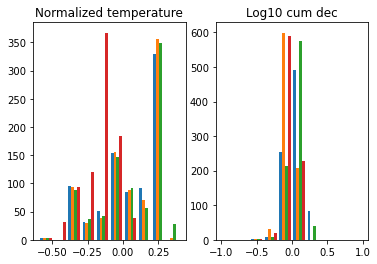

In [152]:
plt.subplot(1,2,1)
plt.hist(temperature_norm);
plt.title('Normalized temperature');
plt.subplot(1,2,2)
plt.hist(cum_dec_log10,range=[-1,1]);
plt.title('Log10 cum dec');

In [153]:
# cum_dec_log10 = np.nan_to_num(cum_dec_log10, posinf=1, neginf=) 
cum_dec_log10.max()

0.26689837817294315

In [163]:
X_train, X_test, Y_train, Y_test = train_test_split(cum_dec_log10, temperature_norm, test_size=0.33, random_state=42)

In [165]:
Y_test.min()

-0.5962808822108233

### Neural network architecture

In [91]:
my_model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(4,)),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=4)
])

In [92]:
print(my_model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                320       
                                                                 
 dense_13 (Dense)            (None, 128)               8320      
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 4)                 260       
                                                                 
Total params: 17,156
Trainable params: 17,156
Non-trainable params: 0
_________________________________________________________________
None


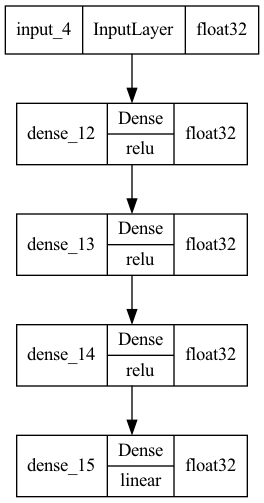

In [93]:
plot_model(my_model, show_dtype=True, show_layer_activations=True)

In [166]:
my_model.compile(optimizer='adam', 
              loss=tf.losses.MeanSquaredError(),
              metrics=['accuracy'])

history = my_model.fit(
    X_train, 
    Y_train,
    batch_size=50,
    epochs=1500, 
    verbose=2,
    validation_split=0.15,
    shuffle=False)

Epoch 1/1500
10/10 - 1s - loss: 4184.4014 - accuracy: 0.4717 - val_loss: 2133.0283 - val_accuracy: 0.2471 - 585ms/epoch - 58ms/step
Epoch 2/1500
10/10 - 0s - loss: 1426.2484 - accuracy: 0.1845 - val_loss: 616.2229 - val_accuracy: 0.0471 - 38ms/epoch - 4ms/step
Epoch 3/1500
10/10 - 0s - loss: 410.6834 - accuracy: 0.0587 - val_loss: 194.3432 - val_accuracy: 0.0353 - 37ms/epoch - 4ms/step
Epoch 4/1500
10/10 - 0s - loss: 143.0754 - accuracy: 0.0440 - val_loss: 84.1562 - val_accuracy: 0.0000e+00 - 37ms/epoch - 4ms/step
Epoch 5/1500
10/10 - 0s - loss: 68.7893 - accuracy: 0.0021 - val_loss: 48.3323 - val_accuracy: 0.0000e+00 - 37ms/epoch - 4ms/step
Epoch 6/1500
10/10 - 0s - loss: 42.4521 - accuracy: 0.0021 - val_loss: 33.5420 - val_accuracy: 0.0000e+00 - 38ms/epoch - 4ms/step
Epoch 7/1500
10/10 - 0s - loss: 31.0011 - accuracy: 0.0000e+00 - val_loss: 26.6049 - val_accuracy: 0.0000e+00 - 38ms/epoch - 4ms/step
Epoch 8/1500
10/10 - 0s - loss: 25.1916 - accuracy: 0.0000e+00 - val_loss: 22.5732 - v

Epoch 66/1500
10/10 - 0s - loss: 0.2964 - accuracy: 0.5094 - val_loss: 0.2382 - val_accuracy: 0.4824 - 37ms/epoch - 4ms/step
Epoch 67/1500
10/10 - 0s - loss: 0.2840 - accuracy: 0.5304 - val_loss: 0.2291 - val_accuracy: 0.4941 - 37ms/epoch - 4ms/step
Epoch 68/1500
10/10 - 0s - loss: 0.2724 - accuracy: 0.5367 - val_loss: 0.2203 - val_accuracy: 0.4941 - 37ms/epoch - 4ms/step
Epoch 69/1500
10/10 - 0s - loss: 0.2619 - accuracy: 0.5388 - val_loss: 0.2130 - val_accuracy: 0.4941 - 37ms/epoch - 4ms/step
Epoch 70/1500
10/10 - 0s - loss: 0.2523 - accuracy: 0.5325 - val_loss: 0.2056 - val_accuracy: 0.4941 - 38ms/epoch - 4ms/step
Epoch 71/1500
10/10 - 0s - loss: 0.2434 - accuracy: 0.5325 - val_loss: 0.1994 - val_accuracy: 0.4941 - 37ms/epoch - 4ms/step
Epoch 72/1500
10/10 - 0s - loss: 0.2342 - accuracy: 0.5451 - val_loss: 0.1901 - val_accuracy: 0.4941 - 37ms/epoch - 4ms/step
Epoch 73/1500
10/10 - 0s - loss: 0.2279 - accuracy: 0.5325 - val_loss: 0.1839 - val_accuracy: 0.5176 - 37ms/epoch - 4ms/step


Epoch 132/1500
10/10 - 0s - loss: 0.0655 - accuracy: 0.3711 - val_loss: 0.0564 - val_accuracy: 0.3412 - 37ms/epoch - 4ms/step
Epoch 133/1500
10/10 - 0s - loss: 0.0645 - accuracy: 0.3669 - val_loss: 0.0557 - val_accuracy: 0.3294 - 38ms/epoch - 4ms/step
Epoch 134/1500
10/10 - 0s - loss: 0.0634 - accuracy: 0.3627 - val_loss: 0.0548 - val_accuracy: 0.3294 - 37ms/epoch - 4ms/step
Epoch 135/1500
10/10 - 0s - loss: 0.0624 - accuracy: 0.3627 - val_loss: 0.0540 - val_accuracy: 0.3294 - 37ms/epoch - 4ms/step
Epoch 136/1500
10/10 - 0s - loss: 0.0614 - accuracy: 0.3627 - val_loss: 0.0533 - val_accuracy: 0.3176 - 37ms/epoch - 4ms/step
Epoch 137/1500
10/10 - 0s - loss: 0.0605 - accuracy: 0.3606 - val_loss: 0.0526 - val_accuracy: 0.3176 - 37ms/epoch - 4ms/step
Epoch 138/1500
10/10 - 0s - loss: 0.0595 - accuracy: 0.3606 - val_loss: 0.0519 - val_accuracy: 0.3176 - 37ms/epoch - 4ms/step
Epoch 139/1500
10/10 - 0s - loss: 0.0587 - accuracy: 0.3606 - val_loss: 0.0511 - val_accuracy: 0.3176 - 37ms/epoch - 4

10/10 - 0s - loss: 0.0338 - accuracy: 0.4403 - val_loss: 0.0277 - val_accuracy: 0.4471 - 37ms/epoch - 4ms/step
Epoch 198/1500
10/10 - 0s - loss: 0.0336 - accuracy: 0.4465 - val_loss: 0.0275 - val_accuracy: 0.4471 - 37ms/epoch - 4ms/step
Epoch 199/1500
10/10 - 0s - loss: 0.0335 - accuracy: 0.4507 - val_loss: 0.0274 - val_accuracy: 0.4471 - 38ms/epoch - 4ms/step
Epoch 200/1500
10/10 - 0s - loss: 0.0333 - accuracy: 0.4507 - val_loss: 0.0272 - val_accuracy: 0.4471 - 37ms/epoch - 4ms/step
Epoch 201/1500
10/10 - 0s - loss: 0.0331 - accuracy: 0.4633 - val_loss: 0.0271 - val_accuracy: 0.4471 - 37ms/epoch - 4ms/step
Epoch 202/1500
10/10 - 0s - loss: 0.0329 - accuracy: 0.4654 - val_loss: 0.0270 - val_accuracy: 0.4471 - 37ms/epoch - 4ms/step
Epoch 203/1500
10/10 - 0s - loss: 0.0327 - accuracy: 0.4654 - val_loss: 0.0268 - val_accuracy: 0.4471 - 38ms/epoch - 4ms/step
Epoch 204/1500
10/10 - 0s - loss: 0.0325 - accuracy: 0.4654 - val_loss: 0.0267 - val_accuracy: 0.4471 - 38ms/epoch - 4ms/step
Epoch 2

Epoch 263/1500
10/10 - 0s - loss: 0.0252 - accuracy: 0.5136 - val_loss: 0.0216 - val_accuracy: 0.4588 - 38ms/epoch - 4ms/step
Epoch 264/1500
10/10 - 0s - loss: 0.0252 - accuracy: 0.5136 - val_loss: 0.0215 - val_accuracy: 0.4706 - 39ms/epoch - 4ms/step
Epoch 265/1500
10/10 - 0s - loss: 0.0251 - accuracy: 0.5157 - val_loss: 0.0215 - val_accuracy: 0.4706 - 37ms/epoch - 4ms/step
Epoch 266/1500
10/10 - 0s - loss: 0.0250 - accuracy: 0.5157 - val_loss: 0.0214 - val_accuracy: 0.4824 - 38ms/epoch - 4ms/step
Epoch 267/1500
10/10 - 0s - loss: 0.0249 - accuracy: 0.5157 - val_loss: 0.0214 - val_accuracy: 0.4941 - 38ms/epoch - 4ms/step
Epoch 268/1500
10/10 - 0s - loss: 0.0249 - accuracy: 0.5178 - val_loss: 0.0213 - val_accuracy: 0.5059 - 37ms/epoch - 4ms/step
Epoch 269/1500
10/10 - 0s - loss: 0.0248 - accuracy: 0.5178 - val_loss: 0.0213 - val_accuracy: 0.5059 - 38ms/epoch - 4ms/step
Epoch 270/1500
10/10 - 0s - loss: 0.0247 - accuracy: 0.5178 - val_loss: 0.0213 - val_accuracy: 0.5059 - 38ms/epoch - 4

10/10 - 0s - loss: 0.0223 - accuracy: 0.5220 - val_loss: 0.0201 - val_accuracy: 0.5059 - 37ms/epoch - 4ms/step
Epoch 329/1500
10/10 - 0s - loss: 0.0222 - accuracy: 0.5220 - val_loss: 0.0201 - val_accuracy: 0.5059 - 38ms/epoch - 4ms/step
Epoch 330/1500
10/10 - 0s - loss: 0.0222 - accuracy: 0.5220 - val_loss: 0.0201 - val_accuracy: 0.5059 - 41ms/epoch - 4ms/step
Epoch 331/1500
10/10 - 0s - loss: 0.0222 - accuracy: 0.5220 - val_loss: 0.0201 - val_accuracy: 0.5059 - 42ms/epoch - 4ms/step
Epoch 332/1500
10/10 - 0s - loss: 0.0221 - accuracy: 0.5220 - val_loss: 0.0200 - val_accuracy: 0.5059 - 41ms/epoch - 4ms/step
Epoch 333/1500
10/10 - 0s - loss: 0.0221 - accuracy: 0.5220 - val_loss: 0.0200 - val_accuracy: 0.5059 - 38ms/epoch - 4ms/step
Epoch 334/1500
10/10 - 0s - loss: 0.0221 - accuracy: 0.5220 - val_loss: 0.0200 - val_accuracy: 0.5059 - 37ms/epoch - 4ms/step
Epoch 335/1500
10/10 - 0s - loss: 0.0220 - accuracy: 0.5157 - val_loss: 0.0200 - val_accuracy: 0.5059 - 37ms/epoch - 4ms/step
Epoch 3

Epoch 394/1500
10/10 - 0s - loss: 0.0205 - accuracy: 0.4948 - val_loss: 0.0186 - val_accuracy: 0.4706 - 37ms/epoch - 4ms/step
Epoch 395/1500
10/10 - 0s - loss: 0.0205 - accuracy: 0.4948 - val_loss: 0.0186 - val_accuracy: 0.4706 - 38ms/epoch - 4ms/step
Epoch 396/1500
10/10 - 0s - loss: 0.0204 - accuracy: 0.4948 - val_loss: 0.0186 - val_accuracy: 0.4706 - 37ms/epoch - 4ms/step
Epoch 397/1500
10/10 - 0s - loss: 0.0204 - accuracy: 0.4948 - val_loss: 0.0186 - val_accuracy: 0.4706 - 38ms/epoch - 4ms/step
Epoch 398/1500
10/10 - 0s - loss: 0.0204 - accuracy: 0.4948 - val_loss: 0.0186 - val_accuracy: 0.4706 - 37ms/epoch - 4ms/step
Epoch 399/1500
10/10 - 0s - loss: 0.0204 - accuracy: 0.4948 - val_loss: 0.0185 - val_accuracy: 0.4706 - 38ms/epoch - 4ms/step
Epoch 400/1500
10/10 - 0s - loss: 0.0204 - accuracy: 0.4948 - val_loss: 0.0185 - val_accuracy: 0.4706 - 38ms/epoch - 4ms/step
Epoch 401/1500
10/10 - 0s - loss: 0.0204 - accuracy: 0.4948 - val_loss: 0.0185 - val_accuracy: 0.4706 - 37ms/epoch - 4

10/10 - 0s - loss: 0.0191 - accuracy: 0.5115 - val_loss: 0.0175 - val_accuracy: 0.5059 - 38ms/epoch - 4ms/step
Epoch 460/1500
10/10 - 0s - loss: 0.0191 - accuracy: 0.5115 - val_loss: 0.0175 - val_accuracy: 0.5059 - 38ms/epoch - 4ms/step
Epoch 461/1500
10/10 - 0s - loss: 0.0191 - accuracy: 0.5115 - val_loss: 0.0175 - val_accuracy: 0.5059 - 38ms/epoch - 4ms/step
Epoch 462/1500
10/10 - 0s - loss: 0.0191 - accuracy: 0.5115 - val_loss: 0.0175 - val_accuracy: 0.5059 - 37ms/epoch - 4ms/step
Epoch 463/1500
10/10 - 0s - loss: 0.0190 - accuracy: 0.5115 - val_loss: 0.0174 - val_accuracy: 0.5059 - 37ms/epoch - 4ms/step
Epoch 464/1500
10/10 - 0s - loss: 0.0190 - accuracy: 0.5115 - val_loss: 0.0174 - val_accuracy: 0.5059 - 38ms/epoch - 4ms/step
Epoch 465/1500
10/10 - 0s - loss: 0.0190 - accuracy: 0.5115 - val_loss: 0.0174 - val_accuracy: 0.5176 - 38ms/epoch - 4ms/step
Epoch 466/1500
10/10 - 0s - loss: 0.0190 - accuracy: 0.5136 - val_loss: 0.0174 - val_accuracy: 0.5176 - 38ms/epoch - 4ms/step
Epoch 4

Epoch 525/1500
10/10 - 0s - loss: 0.0180 - accuracy: 0.5115 - val_loss: 0.0166 - val_accuracy: 0.5294 - 39ms/epoch - 4ms/step
Epoch 526/1500
10/10 - 0s - loss: 0.0180 - accuracy: 0.5052 - val_loss: 0.0166 - val_accuracy: 0.5294 - 39ms/epoch - 4ms/step
Epoch 527/1500
10/10 - 0s - loss: 0.0180 - accuracy: 0.5010 - val_loss: 0.0165 - val_accuracy: 0.5294 - 38ms/epoch - 4ms/step
Epoch 528/1500
10/10 - 0s - loss: 0.0180 - accuracy: 0.5010 - val_loss: 0.0165 - val_accuracy: 0.5294 - 38ms/epoch - 4ms/step
Epoch 529/1500
10/10 - 0s - loss: 0.0179 - accuracy: 0.5052 - val_loss: 0.0165 - val_accuracy: 0.5294 - 38ms/epoch - 4ms/step
Epoch 530/1500
10/10 - 0s - loss: 0.0179 - accuracy: 0.5094 - val_loss: 0.0165 - val_accuracy: 0.5294 - 38ms/epoch - 4ms/step
Epoch 531/1500
10/10 - 0s - loss: 0.0179 - accuracy: 0.5052 - val_loss: 0.0165 - val_accuracy: 0.5294 - 39ms/epoch - 4ms/step
Epoch 532/1500
10/10 - 0s - loss: 0.0179 - accuracy: 0.5010 - val_loss: 0.0165 - val_accuracy: 0.5294 - 38ms/epoch - 4

10/10 - 0s - loss: 0.0171 - accuracy: 0.4822 - val_loss: 0.0156 - val_accuracy: 0.5176 - 42ms/epoch - 4ms/step
Epoch 591/1500
10/10 - 0s - loss: 0.0171 - accuracy: 0.4801 - val_loss: 0.0156 - val_accuracy: 0.5176 - 38ms/epoch - 4ms/step
Epoch 592/1500
10/10 - 0s - loss: 0.0171 - accuracy: 0.4801 - val_loss: 0.0156 - val_accuracy: 0.5176 - 38ms/epoch - 4ms/step
Epoch 593/1500
10/10 - 0s - loss: 0.0171 - accuracy: 0.4801 - val_loss: 0.0156 - val_accuracy: 0.5176 - 42ms/epoch - 4ms/step
Epoch 594/1500
10/10 - 0s - loss: 0.0171 - accuracy: 0.4801 - val_loss: 0.0156 - val_accuracy: 0.5176 - 41ms/epoch - 4ms/step
Epoch 595/1500
10/10 - 0s - loss: 0.0170 - accuracy: 0.4801 - val_loss: 0.0156 - val_accuracy: 0.5176 - 59ms/epoch - 6ms/step
Epoch 596/1500
10/10 - 0s - loss: 0.0170 - accuracy: 0.4801 - val_loss: 0.0155 - val_accuracy: 0.5176 - 51ms/epoch - 5ms/step
Epoch 597/1500
10/10 - 0s - loss: 0.0170 - accuracy: 0.4822 - val_loss: 0.0155 - val_accuracy: 0.5176 - 41ms/epoch - 4ms/step
Epoch 5

Epoch 656/1500
10/10 - 0s - loss: 0.0164 - accuracy: 0.4759 - val_loss: 0.0148 - val_accuracy: 0.5059 - 38ms/epoch - 4ms/step
Epoch 657/1500
10/10 - 0s - loss: 0.0164 - accuracy: 0.4801 - val_loss: 0.0148 - val_accuracy: 0.5059 - 38ms/epoch - 4ms/step
Epoch 658/1500
10/10 - 0s - loss: 0.0163 - accuracy: 0.4780 - val_loss: 0.0147 - val_accuracy: 0.4941 - 38ms/epoch - 4ms/step
Epoch 659/1500
10/10 - 0s - loss: 0.0163 - accuracy: 0.4801 - val_loss: 0.0147 - val_accuracy: 0.4941 - 40ms/epoch - 4ms/step
Epoch 660/1500
10/10 - 0s - loss: 0.0163 - accuracy: 0.4822 - val_loss: 0.0147 - val_accuracy: 0.4941 - 42ms/epoch - 4ms/step
Epoch 661/1500
10/10 - 0s - loss: 0.0163 - accuracy: 0.4843 - val_loss: 0.0147 - val_accuracy: 0.4941 - 38ms/epoch - 4ms/step
Epoch 662/1500
10/10 - 0s - loss: 0.0163 - accuracy: 0.4822 - val_loss: 0.0147 - val_accuracy: 0.4941 - 40ms/epoch - 4ms/step
Epoch 663/1500
10/10 - 0s - loss: 0.0163 - accuracy: 0.4843 - val_loss: 0.0147 - val_accuracy: 0.4941 - 38ms/epoch - 4

10/10 - 0s - loss: 0.0158 - accuracy: 0.4990 - val_loss: 0.0141 - val_accuracy: 0.5294 - 40ms/epoch - 4ms/step
Epoch 722/1500
10/10 - 0s - loss: 0.0158 - accuracy: 0.4948 - val_loss: 0.0141 - val_accuracy: 0.5294 - 38ms/epoch - 4ms/step
Epoch 723/1500
10/10 - 0s - loss: 0.0158 - accuracy: 0.4948 - val_loss: 0.0141 - val_accuracy: 0.5294 - 38ms/epoch - 4ms/step
Epoch 724/1500
10/10 - 0s - loss: 0.0158 - accuracy: 0.4948 - val_loss: 0.0141 - val_accuracy: 0.5294 - 37ms/epoch - 4ms/step
Epoch 725/1500
10/10 - 0s - loss: 0.0158 - accuracy: 0.4948 - val_loss: 0.0141 - val_accuracy: 0.5294 - 37ms/epoch - 4ms/step
Epoch 726/1500
10/10 - 0s - loss: 0.0158 - accuracy: 0.4948 - val_loss: 0.0141 - val_accuracy: 0.5294 - 38ms/epoch - 4ms/step
Epoch 727/1500
10/10 - 0s - loss: 0.0158 - accuracy: 0.4948 - val_loss: 0.0140 - val_accuracy: 0.5294 - 38ms/epoch - 4ms/step
Epoch 728/1500
10/10 - 0s - loss: 0.0158 - accuracy: 0.4948 - val_loss: 0.0140 - val_accuracy: 0.5294 - 37ms/epoch - 4ms/step
Epoch 7

Epoch 787/1500
10/10 - 0s - loss: 0.0155 - accuracy: 0.5031 - val_loss: 0.0135 - val_accuracy: 0.6118 - 38ms/epoch - 4ms/step
Epoch 788/1500
10/10 - 0s - loss: 0.0155 - accuracy: 0.5031 - val_loss: 0.0135 - val_accuracy: 0.6118 - 39ms/epoch - 4ms/step
Epoch 789/1500
10/10 - 0s - loss: 0.0155 - accuracy: 0.5031 - val_loss: 0.0135 - val_accuracy: 0.6118 - 40ms/epoch - 4ms/step
Epoch 790/1500
10/10 - 0s - loss: 0.0155 - accuracy: 0.5031 - val_loss: 0.0135 - val_accuracy: 0.6118 - 37ms/epoch - 4ms/step
Epoch 791/1500
10/10 - 0s - loss: 0.0155 - accuracy: 0.5031 - val_loss: 0.0135 - val_accuracy: 0.6118 - 38ms/epoch - 4ms/step
Epoch 792/1500
10/10 - 0s - loss: 0.0155 - accuracy: 0.5031 - val_loss: 0.0135 - val_accuracy: 0.6118 - 38ms/epoch - 4ms/step
Epoch 793/1500
10/10 - 0s - loss: 0.0155 - accuracy: 0.5031 - val_loss: 0.0135 - val_accuracy: 0.6118 - 38ms/epoch - 4ms/step
Epoch 794/1500
10/10 - 0s - loss: 0.0155 - accuracy: 0.5052 - val_loss: 0.0135 - val_accuracy: 0.6118 - 38ms/epoch - 4

10/10 - 0s - loss: 0.0152 - accuracy: 0.5031 - val_loss: 0.0131 - val_accuracy: 0.6000 - 37ms/epoch - 4ms/step
Epoch 853/1500
10/10 - 0s - loss: 0.0152 - accuracy: 0.5052 - val_loss: 0.0131 - val_accuracy: 0.6000 - 38ms/epoch - 4ms/step
Epoch 854/1500
10/10 - 0s - loss: 0.0152 - accuracy: 0.5052 - val_loss: 0.0131 - val_accuracy: 0.6000 - 37ms/epoch - 4ms/step
Epoch 855/1500
10/10 - 0s - loss: 0.0152 - accuracy: 0.5052 - val_loss: 0.0131 - val_accuracy: 0.6000 - 38ms/epoch - 4ms/step
Epoch 856/1500
10/10 - 0s - loss: 0.0152 - accuracy: 0.5052 - val_loss: 0.0131 - val_accuracy: 0.6000 - 38ms/epoch - 4ms/step
Epoch 857/1500
10/10 - 0s - loss: 0.0152 - accuracy: 0.5052 - val_loss: 0.0131 - val_accuracy: 0.6000 - 38ms/epoch - 4ms/step
Epoch 858/1500
10/10 - 0s - loss: 0.0152 - accuracy: 0.5052 - val_loss: 0.0131 - val_accuracy: 0.6000 - 37ms/epoch - 4ms/step
Epoch 859/1500
10/10 - 0s - loss: 0.0152 - accuracy: 0.5052 - val_loss: 0.0131 - val_accuracy: 0.6000 - 37ms/epoch - 4ms/step
Epoch 8

Epoch 918/1500
10/10 - 0s - loss: 0.0150 - accuracy: 0.5115 - val_loss: 0.0127 - val_accuracy: 0.6118 - 42ms/epoch - 4ms/step
Epoch 919/1500
10/10 - 0s - loss: 0.0150 - accuracy: 0.5052 - val_loss: 0.0127 - val_accuracy: 0.6118 - 43ms/epoch - 4ms/step
Epoch 920/1500
10/10 - 0s - loss: 0.0150 - accuracy: 0.5115 - val_loss: 0.0127 - val_accuracy: 0.6118 - 45ms/epoch - 4ms/step
Epoch 921/1500
10/10 - 0s - loss: 0.0150 - accuracy: 0.5052 - val_loss: 0.0127 - val_accuracy: 0.6118 - 44ms/epoch - 4ms/step
Epoch 922/1500
10/10 - 0s - loss: 0.0150 - accuracy: 0.5052 - val_loss: 0.0127 - val_accuracy: 0.6118 - 43ms/epoch - 4ms/step
Epoch 923/1500
10/10 - 0s - loss: 0.0150 - accuracy: 0.5052 - val_loss: 0.0127 - val_accuracy: 0.6118 - 53ms/epoch - 5ms/step
Epoch 924/1500
10/10 - 0s - loss: 0.0150 - accuracy: 0.5052 - val_loss: 0.0127 - val_accuracy: 0.6118 - 44ms/epoch - 4ms/step
Epoch 925/1500
10/10 - 0s - loss: 0.0150 - accuracy: 0.5052 - val_loss: 0.0127 - val_accuracy: 0.6118 - 40ms/epoch - 4

10/10 - 0s - loss: 0.0148 - accuracy: 0.4927 - val_loss: 0.0124 - val_accuracy: 0.6118 - 38ms/epoch - 4ms/step
Epoch 984/1500
10/10 - 0s - loss: 0.0148 - accuracy: 0.4948 - val_loss: 0.0124 - val_accuracy: 0.6118 - 37ms/epoch - 4ms/step
Epoch 985/1500
10/10 - 0s - loss: 0.0148 - accuracy: 0.5010 - val_loss: 0.0124 - val_accuracy: 0.5765 - 37ms/epoch - 4ms/step
Epoch 986/1500
10/10 - 0s - loss: 0.0148 - accuracy: 0.4948 - val_loss: 0.0124 - val_accuracy: 0.5765 - 38ms/epoch - 4ms/step
Epoch 987/1500
10/10 - 0s - loss: 0.0148 - accuracy: 0.4990 - val_loss: 0.0124 - val_accuracy: 0.5765 - 37ms/epoch - 4ms/step
Epoch 988/1500
10/10 - 0s - loss: 0.0148 - accuracy: 0.4948 - val_loss: 0.0124 - val_accuracy: 0.5765 - 38ms/epoch - 4ms/step
Epoch 989/1500
10/10 - 0s - loss: 0.0148 - accuracy: 0.4990 - val_loss: 0.0124 - val_accuracy: 0.5765 - 39ms/epoch - 4ms/step
Epoch 990/1500
10/10 - 0s - loss: 0.0148 - accuracy: 0.4948 - val_loss: 0.0124 - val_accuracy: 0.5765 - 37ms/epoch - 4ms/step
Epoch 9

Epoch 1048/1500
10/10 - 0s - loss: 0.0147 - accuracy: 0.4969 - val_loss: 0.0121 - val_accuracy: 0.5529 - 40ms/epoch - 4ms/step
Epoch 1049/1500
10/10 - 0s - loss: 0.0147 - accuracy: 0.4969 - val_loss: 0.0121 - val_accuracy: 0.5529 - 38ms/epoch - 4ms/step
Epoch 1050/1500
10/10 - 0s - loss: 0.0147 - accuracy: 0.4969 - val_loss: 0.0121 - val_accuracy: 0.5529 - 37ms/epoch - 4ms/step
Epoch 1051/1500
10/10 - 0s - loss: 0.0147 - accuracy: 0.4969 - val_loss: 0.0121 - val_accuracy: 0.5529 - 39ms/epoch - 4ms/step
Epoch 1052/1500
10/10 - 0s - loss: 0.0147 - accuracy: 0.4969 - val_loss: 0.0121 - val_accuracy: 0.5529 - 38ms/epoch - 4ms/step
Epoch 1053/1500
10/10 - 0s - loss: 0.0147 - accuracy: 0.4969 - val_loss: 0.0121 - val_accuracy: 0.5529 - 38ms/epoch - 4ms/step
Epoch 1054/1500
10/10 - 0s - loss: 0.0147 - accuracy: 0.4969 - val_loss: 0.0121 - val_accuracy: 0.5529 - 38ms/epoch - 4ms/step
Epoch 1055/1500
10/10 - 0s - loss: 0.0147 - accuracy: 0.4948 - val_loss: 0.0121 - val_accuracy: 0.5529 - 37ms/e

Epoch 1113/1500
10/10 - 0s - loss: 0.0146 - accuracy: 0.5031 - val_loss: 0.0119 - val_accuracy: 0.5529 - 39ms/epoch - 4ms/step
Epoch 1114/1500
10/10 - 0s - loss: 0.0146 - accuracy: 0.5031 - val_loss: 0.0119 - val_accuracy: 0.5529 - 37ms/epoch - 4ms/step
Epoch 1115/1500
10/10 - 0s - loss: 0.0146 - accuracy: 0.5031 - val_loss: 0.0118 - val_accuracy: 0.5529 - 37ms/epoch - 4ms/step
Epoch 1116/1500
10/10 - 0s - loss: 0.0147 - accuracy: 0.5010 - val_loss: 0.0118 - val_accuracy: 0.5529 - 39ms/epoch - 4ms/step
Epoch 1117/1500
10/10 - 0s - loss: 0.0146 - accuracy: 0.5010 - val_loss: 0.0118 - val_accuracy: 0.5529 - 37ms/epoch - 4ms/step
Epoch 1118/1500
10/10 - 0s - loss: 0.0146 - accuracy: 0.5010 - val_loss: 0.0118 - val_accuracy: 0.5529 - 38ms/epoch - 4ms/step
Epoch 1119/1500
10/10 - 0s - loss: 0.0146 - accuracy: 0.5010 - val_loss: 0.0118 - val_accuracy: 0.5529 - 37ms/epoch - 4ms/step
Epoch 1120/1500
10/10 - 0s - loss: 0.0146 - accuracy: 0.5010 - val_loss: 0.0118 - val_accuracy: 0.5529 - 37ms/e

Epoch 1178/1500
10/10 - 0s - loss: 0.0145 - accuracy: 0.5052 - val_loss: 0.0115 - val_accuracy: 0.4941 - 42ms/epoch - 4ms/step
Epoch 1179/1500
10/10 - 0s - loss: 0.0145 - accuracy: 0.5094 - val_loss: 0.0115 - val_accuracy: 0.4941 - 46ms/epoch - 5ms/step
Epoch 1180/1500
10/10 - 0s - loss: 0.0145 - accuracy: 0.5073 - val_loss: 0.0115 - val_accuracy: 0.4941 - 46ms/epoch - 5ms/step
Epoch 1181/1500
10/10 - 0s - loss: 0.0145 - accuracy: 0.5073 - val_loss: 0.0115 - val_accuracy: 0.5647 - 50ms/epoch - 5ms/step
Epoch 1182/1500
10/10 - 0s - loss: 0.0145 - accuracy: 0.5073 - val_loss: 0.0115 - val_accuracy: 0.4941 - 41ms/epoch - 4ms/step
Epoch 1183/1500
10/10 - 0s - loss: 0.0145 - accuracy: 0.5052 - val_loss: 0.0115 - val_accuracy: 0.4941 - 38ms/epoch - 4ms/step
Epoch 1184/1500
10/10 - 0s - loss: 0.0145 - accuracy: 0.5073 - val_loss: 0.0115 - val_accuracy: 0.4941 - 39ms/epoch - 4ms/step
Epoch 1185/1500
10/10 - 0s - loss: 0.0145 - accuracy: 0.5073 - val_loss: 0.0115 - val_accuracy: 0.4941 - 38ms/e

Epoch 1243/1500
10/10 - 0s - loss: 0.0144 - accuracy: 0.5094 - val_loss: 0.0113 - val_accuracy: 0.4941 - 37ms/epoch - 4ms/step
Epoch 1244/1500
10/10 - 0s - loss: 0.0144 - accuracy: 0.5094 - val_loss: 0.0113 - val_accuracy: 0.4941 - 39ms/epoch - 4ms/step
Epoch 1245/1500
10/10 - 0s - loss: 0.0144 - accuracy: 0.5094 - val_loss: 0.0113 - val_accuracy: 0.4941 - 38ms/epoch - 4ms/step
Epoch 1246/1500
10/10 - 0s - loss: 0.0144 - accuracy: 0.5073 - val_loss: 0.0113 - val_accuracy: 0.4941 - 38ms/epoch - 4ms/step
Epoch 1247/1500
10/10 - 0s - loss: 0.0144 - accuracy: 0.5073 - val_loss: 0.0113 - val_accuracy: 0.4941 - 37ms/epoch - 4ms/step
Epoch 1248/1500
10/10 - 0s - loss: 0.0144 - accuracy: 0.5073 - val_loss: 0.0113 - val_accuracy: 0.4941 - 37ms/epoch - 4ms/step
Epoch 1249/1500
10/10 - 0s - loss: 0.0144 - accuracy: 0.5073 - val_loss: 0.0113 - val_accuracy: 0.4941 - 38ms/epoch - 4ms/step
Epoch 1250/1500
10/10 - 0s - loss: 0.0144 - accuracy: 0.5073 - val_loss: 0.0113 - val_accuracy: 0.4941 - 39ms/e

Epoch 1308/1500
10/10 - 0s - loss: 0.0142 - accuracy: 0.5115 - val_loss: 0.0111 - val_accuracy: 0.5059 - 38ms/epoch - 4ms/step
Epoch 1309/1500
10/10 - 0s - loss: 0.0143 - accuracy: 0.5115 - val_loss: 0.0111 - val_accuracy: 0.4941 - 39ms/epoch - 4ms/step
Epoch 1310/1500
10/10 - 0s - loss: 0.0142 - accuracy: 0.5094 - val_loss: 0.0111 - val_accuracy: 0.4941 - 38ms/epoch - 4ms/step
Epoch 1311/1500
10/10 - 0s - loss: 0.0142 - accuracy: 0.5094 - val_loss: 0.0111 - val_accuracy: 0.4941 - 37ms/epoch - 4ms/step
Epoch 1312/1500
10/10 - 0s - loss: 0.0143 - accuracy: 0.5094 - val_loss: 0.0111 - val_accuracy: 0.4941 - 39ms/epoch - 4ms/step
Epoch 1313/1500
10/10 - 0s - loss: 0.0142 - accuracy: 0.5094 - val_loss: 0.0111 - val_accuracy: 0.4941 - 37ms/epoch - 4ms/step
Epoch 1314/1500
10/10 - 0s - loss: 0.0142 - accuracy: 0.5094 - val_loss: 0.0111 - val_accuracy: 0.4941 - 39ms/epoch - 4ms/step
Epoch 1315/1500
10/10 - 0s - loss: 0.0142 - accuracy: 0.5094 - val_loss: 0.0111 - val_accuracy: 0.4941 - 38ms/e

Epoch 1373/1500
10/10 - 0s - loss: 0.0140 - accuracy: 0.4948 - val_loss: 0.0109 - val_accuracy: 0.4471 - 38ms/epoch - 4ms/step
Epoch 1374/1500
10/10 - 0s - loss: 0.0140 - accuracy: 0.4948 - val_loss: 0.0109 - val_accuracy: 0.4471 - 38ms/epoch - 4ms/step
Epoch 1375/1500
10/10 - 0s - loss: 0.0140 - accuracy: 0.4948 - val_loss: 0.0109 - val_accuracy: 0.4471 - 39ms/epoch - 4ms/step
Epoch 1376/1500
10/10 - 0s - loss: 0.0140 - accuracy: 0.4948 - val_loss: 0.0109 - val_accuracy: 0.4471 - 39ms/epoch - 4ms/step
Epoch 1377/1500
10/10 - 0s - loss: 0.0140 - accuracy: 0.4948 - val_loss: 0.0109 - val_accuracy: 0.4471 - 39ms/epoch - 4ms/step
Epoch 1378/1500
10/10 - 0s - loss: 0.0140 - accuracy: 0.4906 - val_loss: 0.0109 - val_accuracy: 0.4471 - 39ms/epoch - 4ms/step
Epoch 1379/1500
10/10 - 0s - loss: 0.0140 - accuracy: 0.4906 - val_loss: 0.0109 - val_accuracy: 0.4471 - 39ms/epoch - 4ms/step
Epoch 1380/1500
10/10 - 0s - loss: 0.0140 - accuracy: 0.4927 - val_loss: 0.0109 - val_accuracy: 0.4471 - 39ms/e

Epoch 1438/1500
10/10 - 0s - loss: 0.0139 - accuracy: 0.4948 - val_loss: 0.0109 - val_accuracy: 0.4353 - 37ms/epoch - 4ms/step
Epoch 1439/1500
10/10 - 0s - loss: 0.0139 - accuracy: 0.4948 - val_loss: 0.0109 - val_accuracy: 0.4353 - 37ms/epoch - 4ms/step
Epoch 1440/1500
10/10 - 0s - loss: 0.0140 - accuracy: 0.4948 - val_loss: 0.0109 - val_accuracy: 0.4353 - 38ms/epoch - 4ms/step
Epoch 1441/1500
10/10 - 0s - loss: 0.0140 - accuracy: 0.4948 - val_loss: 0.0109 - val_accuracy: 0.4353 - 37ms/epoch - 4ms/step
Epoch 1442/1500
10/10 - 0s - loss: 0.0140 - accuracy: 0.4948 - val_loss: 0.0109 - val_accuracy: 0.4353 - 37ms/epoch - 4ms/step
Epoch 1443/1500
10/10 - 0s - loss: 0.0139 - accuracy: 0.4948 - val_loss: 0.0109 - val_accuracy: 0.4353 - 36ms/epoch - 4ms/step
Epoch 1444/1500
10/10 - 0s - loss: 0.0140 - accuracy: 0.4948 - val_loss: 0.0109 - val_accuracy: 0.4353 - 37ms/epoch - 4ms/step
Epoch 1445/1500
10/10 - 0s - loss: 0.0140 - accuracy: 0.4948 - val_loss: 0.0109 - val_accuracy: 0.4353 - 37ms/e

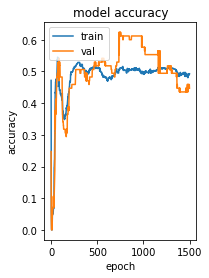

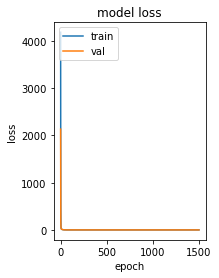

In [167]:
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [168]:
y_predictions = my_model.predict(X_test)
y_predictions

9/9 [==============================] - 0s 1ms/step


array([[ 0.13135123,  0.16057178,  0.13462442, -0.14428553],
       [ 0.19849563,  0.23422453,  0.22861493, -0.06327733],
       [ 0.2072115 ,  0.22913024,  0.2125063 , -0.06871435],
       ...,
       [ 0.15367365,  0.17588612,  0.17308688, -0.0948883 ],
       [ 0.1153847 ,  0.14590988,  0.12715572, -0.15342239],
       [ 0.20472157,  0.23370358,  0.22507381, -0.07991639]],
      dtype=float32)

In [202]:
from sklearn.metrics import median_absolute_error, explained_variance_score, mean_squared_error, accuracy_score

In [178]:
median_absolute_error(Y_test, y_predictions)

0.07600295238877876

In [179]:
explained_variance_score(Y_test, y_predictions)

0.6224737851807106

In [180]:
mean_squared_error(Y_test, y_predictions)

0.013963058678355903

## Load cumulative data and train neural network on the combined and globally normalized decorrelation data

In [181]:
cum_dec_4points = all_data['cumDecAt4points']
cum_dec_global_4points = all_data['cumAltDecAt4points']
cum_dec_local_4points = all_data['simpleCumDecAt4points']
cum_IBS_4points = all_data['cumIBSnormAt4points']
temperature_4points = all_data['temperatureAt4Points']

(840, 4)

### Clean and normalize the data

In [182]:
cum_dec_4points = np.transpose(cum_dec_4points,[0,2,1])
cum_dec_global_4points = np.transpose(cum_dec_global_4points,[0,2,1])
temperature_4points = np.transpose(temperature_4points,[0,2,1])

cum_dec_4points.shape

(14, 60, 4)

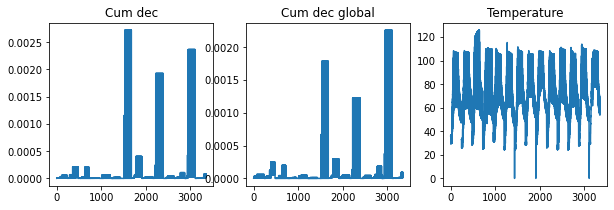

In [183]:
plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plt.plot(cum_dec_4points.ravel())
plt.title('Cum dec');
plt.subplot(1,3,2)
plt.plot(cum_dec_global_4points.ravel())
plt.title('Cum dec global');
plt.subplot(1,3,3)
plt.plot(temperature_4points.ravel())
plt.title('Temperature');

In [184]:
cum_dec_4points_vec = cum_dec_4points.reshape([14*60,4])
cum_dec_global_4points_vec = cum_dec_global_4points.reshape([14*60,4])
temperature_4points_vec = temperature_4points.reshape([14*60,4])
cum_dec_4points_vec.shape

(840, 4)

In [185]:
cum_dec_4points_vec = cum_dec_4points_vec[~np.isnan(temperature_4points_vec)].reshape([-1,4])
cum_dec_global_4points_vec = cum_dec_global_4points_vec[~np.isnan(temperature_4points_vec)].reshape([-1,4])
temperature_4points_vec = temperature_4points_vec[~np.isnan(temperature_4points_vec)].reshape([-1,4])

/var/folders/mq/2m2rd5h112v8vr5mhrwbt3l80000gn/T/ipykernel_15925/4264171609.py:1: RuntimeWarning: divide by zero encountered in log10
  cum_dec_log10 = np.log10(cum_dec_4points_vec)


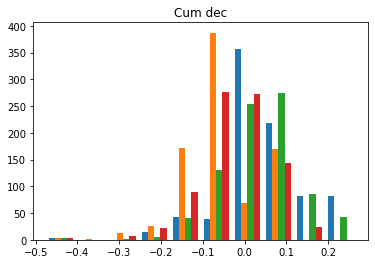

In [230]:
cum_dec_log10 = np.log10(cum_dec_4points_vec)
cum_dec_log10 = np.nan_to_num(cum_dec_log10,posinf=0, neginf=-10)
cum_dec_log10_absmax = abs(cum_dec_log10).max()
cum_dec_log10 = cum_dec_log10 / cum_dec_log10_absmax
cum_dec_log10_mean = np.mean(cum_dec_log10)
cum_dec_log10 = cum_dec_log10 - cum_dec_log10_mean
plt.hist(cum_dec_log10);
plt.title('Cum dec');

/var/folders/mq/2m2rd5h112v8vr5mhrwbt3l80000gn/T/ipykernel_15925/3215316156.py:1: RuntimeWarning: divide by zero encountered in log10
  cum_dec_global_log10 = np.log10(cum_dec_global_4points_vec)


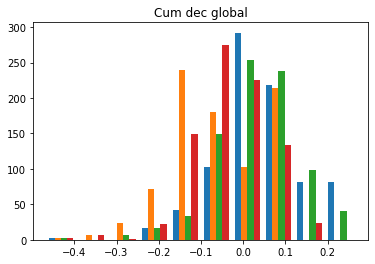

In [188]:
cum_dec_global_log10 = np.log10(cum_dec_global_4points_vec)
cum_dec_global_log10 = np.nan_to_num(cum_dec_global_log10,posinf=0, neginf=-10)
cum_dec_global_log10 = cum_dec_global_log10 / abs(cum_dec_global_log10).max()
cum_dec_global_log10 = cum_dec_global_log10 - np.mean(cum_dec_global_log10)
plt.hist(cum_dec_global_log10);
plt.title('Cum dec global');

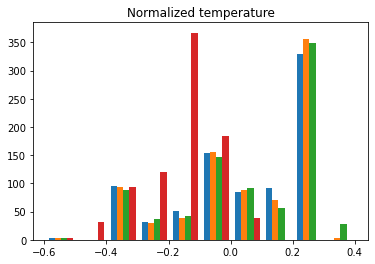

In [189]:
temperature_4points_max = temperature_4points_vec.max()
temperature_norm = temperature_4points_vec / temperature_4points_max
temperature_norm_mean = temperature_norm.mean()
temperature_norm = temperature_norm - temperature_norm_mean
temperature_norm.min()
plt.hist(temperature_norm);
plt.title('Normalized temperature');

In [193]:
cum_dec_comb_glob = np.concatenate((cum_dec_log10, cum_dec_global_log10), axis=1)
cum_dec_comb_glob.shape

(839, 8)

In [194]:
X_train, X_test, Y_train, Y_test = train_test_split(cum_dec_comb_glob, temperature_norm, test_size=0.33, random_state=42)

In [196]:
Y_train.shape

(562, 4)

### Neural network architecture for combined and globally norm. decorr.

In [197]:
my_model2 = keras.Sequential([
    keras.layers.InputLayer(input_shape=(8,)),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=4)
])

print(my_model2.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 64)                576       
                                                                 
 dense_17 (Dense)            (None, 128)               8320      
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 dense_19 (Dense)            (None, 4)                 260       
                                                                 
Total params: 17,412
Trainable params: 17,412
Non-trainable params: 0
_________________________________________________________________
None


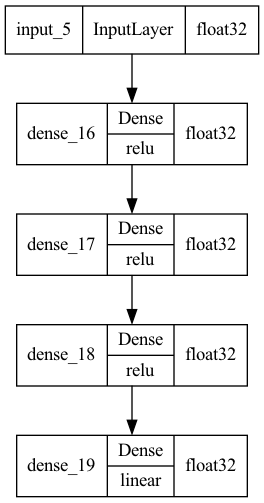

In [198]:
plot_model(my_model2, show_dtype=True, show_layer_activations=True)

In [199]:
my_model2.compile(optimizer='adam', 
              loss=tf.losses.MeanSquaredError(),
              metrics=['accuracy'])

history = my_model2.fit(
    X_train, 
    Y_train,
    batch_size=50,
    epochs=1000, 
    verbose=2,
    validation_split=0.15,
    shuffle=False)

Epoch 1/1000
10/10 - 1s - loss: 0.0361 - accuracy: 0.3124 - val_loss: 0.0258 - val_accuracy: 0.2941 - 603ms/epoch - 60ms/step
Epoch 2/1000
10/10 - 0s - loss: 0.0230 - accuracy: 0.3501 - val_loss: 0.0189 - val_accuracy: 0.3647 - 39ms/epoch - 4ms/step
Epoch 3/1000
10/10 - 0s - loss: 0.0199 - accuracy: 0.4277 - val_loss: 0.0166 - val_accuracy: 0.4235 - 38ms/epoch - 4ms/step
Epoch 4/1000
10/10 - 0s - loss: 0.0182 - accuracy: 0.4591 - val_loss: 0.0158 - val_accuracy: 0.3765 - 37ms/epoch - 4ms/step
Epoch 5/1000
10/10 - 0s - loss: 0.0173 - accuracy: 0.4298 - val_loss: 0.0149 - val_accuracy: 0.4941 - 39ms/epoch - 4ms/step
Epoch 6/1000
10/10 - 0s - loss: 0.0166 - accuracy: 0.5031 - val_loss: 0.0140 - val_accuracy: 0.4235 - 38ms/epoch - 4ms/step
Epoch 7/1000
10/10 - 0s - loss: 0.0161 - accuracy: 0.4843 - val_loss: 0.0135 - val_accuracy: 0.4353 - 38ms/epoch - 4ms/step
Epoch 8/1000
10/10 - 0s - loss: 0.0155 - accuracy: 0.5178 - val_loss: 0.0129 - val_accuracy: 0.4706 - 38ms/epoch - 4ms/step
Epoch 

Epoch 67/1000
10/10 - 0s - loss: 0.0094 - accuracy: 0.7233 - val_loss: 0.0101 - val_accuracy: 0.7765 - 37ms/epoch - 4ms/step
Epoch 68/1000
10/10 - 0s - loss: 0.0094 - accuracy: 0.7170 - val_loss: 0.0101 - val_accuracy: 0.7647 - 37ms/epoch - 4ms/step
Epoch 69/1000
10/10 - 0s - loss: 0.0093 - accuracy: 0.7170 - val_loss: 0.0101 - val_accuracy: 0.7529 - 38ms/epoch - 4ms/step
Epoch 70/1000
10/10 - 0s - loss: 0.0092 - accuracy: 0.7275 - val_loss: 0.0101 - val_accuracy: 0.7529 - 37ms/epoch - 4ms/step
Epoch 71/1000
10/10 - 0s - loss: 0.0092 - accuracy: 0.7170 - val_loss: 0.0100 - val_accuracy: 0.7529 - 38ms/epoch - 4ms/step
Epoch 72/1000
10/10 - 0s - loss: 0.0091 - accuracy: 0.7233 - val_loss: 0.0099 - val_accuracy: 0.7647 - 37ms/epoch - 4ms/step
Epoch 73/1000
10/10 - 0s - loss: 0.0091 - accuracy: 0.7296 - val_loss: 0.0099 - val_accuracy: 0.7647 - 38ms/epoch - 4ms/step
Epoch 74/1000
10/10 - 0s - loss: 0.0090 - accuracy: 0.7170 - val_loss: 0.0099 - val_accuracy: 0.7647 - 38ms/epoch - 4ms/step


Epoch 133/1000
10/10 - 0s - loss: 0.0073 - accuracy: 0.7463 - val_loss: 0.0090 - val_accuracy: 0.7765 - 38ms/epoch - 4ms/step
Epoch 134/1000
10/10 - 0s - loss: 0.0073 - accuracy: 0.7547 - val_loss: 0.0092 - val_accuracy: 0.7882 - 37ms/epoch - 4ms/step
Epoch 135/1000
10/10 - 0s - loss: 0.0074 - accuracy: 0.7463 - val_loss: 0.0090 - val_accuracy: 0.7529 - 37ms/epoch - 4ms/step
Epoch 136/1000
10/10 - 0s - loss: 0.0073 - accuracy: 0.7589 - val_loss: 0.0092 - val_accuracy: 0.7176 - 38ms/epoch - 4ms/step
Epoch 137/1000
10/10 - 0s - loss: 0.0073 - accuracy: 0.7358 - val_loss: 0.0090 - val_accuracy: 0.7529 - 38ms/epoch - 4ms/step
Epoch 138/1000
10/10 - 0s - loss: 0.0073 - accuracy: 0.7610 - val_loss: 0.0092 - val_accuracy: 0.7176 - 38ms/epoch - 4ms/step
Epoch 139/1000
10/10 - 0s - loss: 0.0073 - accuracy: 0.7547 - val_loss: 0.0089 - val_accuracy: 0.7529 - 37ms/epoch - 4ms/step
Epoch 140/1000
10/10 - 0s - loss: 0.0073 - accuracy: 0.7547 - val_loss: 0.0093 - val_accuracy: 0.7529 - 38ms/epoch - 4

10/10 - 0s - loss: 0.0068 - accuracy: 0.7631 - val_loss: 0.0099 - val_accuracy: 0.7412 - 37ms/epoch - 4ms/step
Epoch 199/1000
10/10 - 0s - loss: 0.0069 - accuracy: 0.7757 - val_loss: 0.0101 - val_accuracy: 0.7882 - 38ms/epoch - 4ms/step
Epoch 200/1000
10/10 - 0s - loss: 0.0069 - accuracy: 0.7673 - val_loss: 0.0099 - val_accuracy: 0.7765 - 38ms/epoch - 4ms/step
Epoch 201/1000
10/10 - 0s - loss: 0.0068 - accuracy: 0.7883 - val_loss: 0.0097 - val_accuracy: 0.8000 - 37ms/epoch - 4ms/step
Epoch 202/1000
10/10 - 0s - loss: 0.0067 - accuracy: 0.7862 - val_loss: 0.0095 - val_accuracy: 0.7647 - 38ms/epoch - 4ms/step
Epoch 203/1000
10/10 - 0s - loss: 0.0067 - accuracy: 0.7673 - val_loss: 0.0094 - val_accuracy: 0.7647 - 38ms/epoch - 4ms/step
Epoch 204/1000
10/10 - 0s - loss: 0.0065 - accuracy: 0.7652 - val_loss: 0.0094 - val_accuracy: 0.7529 - 38ms/epoch - 4ms/step
Epoch 205/1000
10/10 - 0s - loss: 0.0066 - accuracy: 0.7715 - val_loss: 0.0092 - val_accuracy: 0.7647 - 38ms/epoch - 4ms/step
Epoch 2

Epoch 264/1000
10/10 - 0s - loss: 0.0062 - accuracy: 0.7757 - val_loss: 0.0088 - val_accuracy: 0.7176 - 37ms/epoch - 4ms/step
Epoch 265/1000
10/10 - 0s - loss: 0.0062 - accuracy: 0.7820 - val_loss: 0.0089 - val_accuracy: 0.7412 - 38ms/epoch - 4ms/step
Epoch 266/1000
10/10 - 0s - loss: 0.0062 - accuracy: 0.7778 - val_loss: 0.0087 - val_accuracy: 0.7647 - 38ms/epoch - 4ms/step
Epoch 267/1000
10/10 - 0s - loss: 0.0062 - accuracy: 0.7652 - val_loss: 0.0089 - val_accuracy: 0.7529 - 38ms/epoch - 4ms/step
Epoch 268/1000
10/10 - 0s - loss: 0.0062 - accuracy: 0.7736 - val_loss: 0.0089 - val_accuracy: 0.7412 - 38ms/epoch - 4ms/step
Epoch 269/1000
10/10 - 0s - loss: 0.0062 - accuracy: 0.7820 - val_loss: 0.0089 - val_accuracy: 0.7647 - 37ms/epoch - 4ms/step
Epoch 270/1000
10/10 - 0s - loss: 0.0062 - accuracy: 0.7883 - val_loss: 0.0090 - val_accuracy: 0.7647 - 38ms/epoch - 4ms/step
Epoch 271/1000
10/10 - 0s - loss: 0.0062 - accuracy: 0.7715 - val_loss: 0.0089 - val_accuracy: 0.7412 - 37ms/epoch - 4

10/10 - 0s - loss: 0.0062 - accuracy: 0.8155 - val_loss: 0.0091 - val_accuracy: 0.7882 - 37ms/epoch - 4ms/step
Epoch 330/1000
10/10 - 0s - loss: 0.0062 - accuracy: 0.8092 - val_loss: 0.0091 - val_accuracy: 0.7765 - 37ms/epoch - 4ms/step
Epoch 331/1000
10/10 - 0s - loss: 0.0061 - accuracy: 0.8134 - val_loss: 0.0090 - val_accuracy: 0.7647 - 38ms/epoch - 4ms/step
Epoch 332/1000
10/10 - 0s - loss: 0.0061 - accuracy: 0.8050 - val_loss: 0.0089 - val_accuracy: 0.7765 - 37ms/epoch - 4ms/step
Epoch 333/1000
10/10 - 0s - loss: 0.0060 - accuracy: 0.7841 - val_loss: 0.0088 - val_accuracy: 0.7647 - 37ms/epoch - 4ms/step
Epoch 334/1000
10/10 - 0s - loss: 0.0060 - accuracy: 0.7904 - val_loss: 0.0087 - val_accuracy: 0.8118 - 38ms/epoch - 4ms/step
Epoch 335/1000
10/10 - 0s - loss: 0.0060 - accuracy: 0.7945 - val_loss: 0.0088 - val_accuracy: 0.7647 - 38ms/epoch - 4ms/step
Epoch 336/1000
10/10 - 0s - loss: 0.0060 - accuracy: 0.7966 - val_loss: 0.0087 - val_accuracy: 0.7647 - 38ms/epoch - 4ms/step
Epoch 3

Epoch 395/1000
10/10 - 0s - loss: 0.0060 - accuracy: 0.7987 - val_loss: 0.0085 - val_accuracy: 0.7059 - 37ms/epoch - 4ms/step
Epoch 396/1000
10/10 - 0s - loss: 0.0060 - accuracy: 0.8197 - val_loss: 0.0089 - val_accuracy: 0.7882 - 37ms/epoch - 4ms/step
Epoch 397/1000
10/10 - 0s - loss: 0.0060 - accuracy: 0.8155 - val_loss: 0.0085 - val_accuracy: 0.7529 - 38ms/epoch - 4ms/step
Epoch 398/1000
10/10 - 0s - loss: 0.0060 - accuracy: 0.8071 - val_loss: 0.0089 - val_accuracy: 0.7647 - 38ms/epoch - 4ms/step
Epoch 399/1000
10/10 - 0s - loss: 0.0060 - accuracy: 0.7945 - val_loss: 0.0087 - val_accuracy: 0.7882 - 38ms/epoch - 4ms/step
Epoch 400/1000
10/10 - 0s - loss: 0.0060 - accuracy: 0.8239 - val_loss: 0.0089 - val_accuracy: 0.7882 - 37ms/epoch - 4ms/step
Epoch 401/1000
10/10 - 0s - loss: 0.0060 - accuracy: 0.7987 - val_loss: 0.0090 - val_accuracy: 0.8000 - 38ms/epoch - 4ms/step
Epoch 402/1000
10/10 - 0s - loss: 0.0061 - accuracy: 0.7987 - val_loss: 0.0090 - val_accuracy: 0.7882 - 37ms/epoch - 4

10/10 - 0s - loss: 0.0058 - accuracy: 0.8008 - val_loss: 0.0085 - val_accuracy: 0.8000 - 38ms/epoch - 4ms/step
Epoch 461/1000
10/10 - 0s - loss: 0.0058 - accuracy: 0.8449 - val_loss: 0.0084 - val_accuracy: 0.7647 - 38ms/epoch - 4ms/step
Epoch 462/1000
10/10 - 0s - loss: 0.0059 - accuracy: 0.8092 - val_loss: 0.0086 - val_accuracy: 0.7765 - 38ms/epoch - 4ms/step
Epoch 463/1000
10/10 - 0s - loss: 0.0058 - accuracy: 0.8008 - val_loss: 0.0084 - val_accuracy: 0.8000 - 37ms/epoch - 4ms/step
Epoch 464/1000
10/10 - 0s - loss: 0.0058 - accuracy: 0.8239 - val_loss: 0.0085 - val_accuracy: 0.8000 - 37ms/epoch - 4ms/step
Epoch 465/1000
10/10 - 0s - loss: 0.0058 - accuracy: 0.8071 - val_loss: 0.0087 - val_accuracy: 0.8000 - 37ms/epoch - 4ms/step
Epoch 466/1000
10/10 - 0s - loss: 0.0058 - accuracy: 0.8113 - val_loss: 0.0085 - val_accuracy: 0.8000 - 37ms/epoch - 4ms/step
Epoch 467/1000
10/10 - 0s - loss: 0.0059 - accuracy: 0.8155 - val_loss: 0.0087 - val_accuracy: 0.8000 - 38ms/epoch - 4ms/step
Epoch 4

Epoch 526/1000
10/10 - 0s - loss: 0.0057 - accuracy: 0.8260 - val_loss: 0.0084 - val_accuracy: 0.7412 - 38ms/epoch - 4ms/step
Epoch 527/1000
10/10 - 0s - loss: 0.0057 - accuracy: 0.8155 - val_loss: 0.0084 - val_accuracy: 0.7412 - 38ms/epoch - 4ms/step
Epoch 528/1000
10/10 - 0s - loss: 0.0058 - accuracy: 0.8365 - val_loss: 0.0085 - val_accuracy: 0.7765 - 37ms/epoch - 4ms/step
Epoch 529/1000
10/10 - 0s - loss: 0.0058 - accuracy: 0.8239 - val_loss: 0.0085 - val_accuracy: 0.7765 - 37ms/epoch - 4ms/step
Epoch 530/1000
10/10 - 0s - loss: 0.0058 - accuracy: 0.8050 - val_loss: 0.0083 - val_accuracy: 0.7765 - 38ms/epoch - 4ms/step
Epoch 531/1000
10/10 - 0s - loss: 0.0058 - accuracy: 0.8407 - val_loss: 0.0085 - val_accuracy: 0.8235 - 37ms/epoch - 4ms/step
Epoch 532/1000
10/10 - 0s - loss: 0.0058 - accuracy: 0.8239 - val_loss: 0.0085 - val_accuracy: 0.8000 - 38ms/epoch - 4ms/step
Epoch 533/1000
10/10 - 0s - loss: 0.0058 - accuracy: 0.8302 - val_loss: 0.0084 - val_accuracy: 0.7647 - 39ms/epoch - 4

10/10 - 0s - loss: 0.0058 - accuracy: 0.8323 - val_loss: 0.0085 - val_accuracy: 0.7882 - 38ms/epoch - 4ms/step
Epoch 592/1000
10/10 - 0s - loss: 0.0057 - accuracy: 0.8344 - val_loss: 0.0084 - val_accuracy: 0.7529 - 38ms/epoch - 4ms/step
Epoch 593/1000
10/10 - 0s - loss: 0.0058 - accuracy: 0.8323 - val_loss: 0.0085 - val_accuracy: 0.8000 - 39ms/epoch - 4ms/step
Epoch 594/1000
10/10 - 0s - loss: 0.0058 - accuracy: 0.8344 - val_loss: 0.0085 - val_accuracy: 0.7647 - 38ms/epoch - 4ms/step
Epoch 595/1000
10/10 - 0s - loss: 0.0057 - accuracy: 0.8302 - val_loss: 0.0085 - val_accuracy: 0.8000 - 38ms/epoch - 4ms/step
Epoch 596/1000
10/10 - 0s - loss: 0.0058 - accuracy: 0.8302 - val_loss: 0.0085 - val_accuracy: 0.8000 - 38ms/epoch - 4ms/step
Epoch 597/1000
10/10 - 0s - loss: 0.0058 - accuracy: 0.8239 - val_loss: 0.0085 - val_accuracy: 0.8000 - 37ms/epoch - 4ms/step
Epoch 598/1000
10/10 - 0s - loss: 0.0057 - accuracy: 0.8407 - val_loss: 0.0085 - val_accuracy: 0.7882 - 38ms/epoch - 4ms/step
Epoch 5

Epoch 657/1000
10/10 - 0s - loss: 0.0057 - accuracy: 0.8553 - val_loss: 0.0084 - val_accuracy: 0.8235 - 38ms/epoch - 4ms/step
Epoch 658/1000
10/10 - 0s - loss: 0.0057 - accuracy: 0.8512 - val_loss: 0.0084 - val_accuracy: 0.8000 - 38ms/epoch - 4ms/step
Epoch 659/1000
10/10 - 0s - loss: 0.0057 - accuracy: 0.8407 - val_loss: 0.0084 - val_accuracy: 0.8235 - 38ms/epoch - 4ms/step
Epoch 660/1000
10/10 - 0s - loss: 0.0057 - accuracy: 0.8449 - val_loss: 0.0084 - val_accuracy: 0.8000 - 38ms/epoch - 4ms/step
Epoch 661/1000
10/10 - 0s - loss: 0.0057 - accuracy: 0.8449 - val_loss: 0.0083 - val_accuracy: 0.7882 - 37ms/epoch - 4ms/step
Epoch 662/1000
10/10 - 0s - loss: 0.0057 - accuracy: 0.8218 - val_loss: 0.0083 - val_accuracy: 0.8118 - 38ms/epoch - 4ms/step
Epoch 663/1000
10/10 - 0s - loss: 0.0057 - accuracy: 0.8260 - val_loss: 0.0083 - val_accuracy: 0.8353 - 38ms/epoch - 4ms/step
Epoch 664/1000
10/10 - 0s - loss: 0.0057 - accuracy: 0.8407 - val_loss: 0.0083 - val_accuracy: 0.8118 - 37ms/epoch - 4

10/10 - 0s - loss: 0.0056 - accuracy: 0.8616 - val_loss: 0.0083 - val_accuracy: 0.8235 - 37ms/epoch - 4ms/step
Epoch 723/1000
10/10 - 0s - loss: 0.0056 - accuracy: 0.8532 - val_loss: 0.0083 - val_accuracy: 0.8235 - 38ms/epoch - 4ms/step
Epoch 724/1000
10/10 - 0s - loss: 0.0056 - accuracy: 0.8512 - val_loss: 0.0082 - val_accuracy: 0.8000 - 38ms/epoch - 4ms/step
Epoch 725/1000
10/10 - 0s - loss: 0.0056 - accuracy: 0.8407 - val_loss: 0.0082 - val_accuracy: 0.8118 - 38ms/epoch - 4ms/step
Epoch 726/1000
10/10 - 0s - loss: 0.0056 - accuracy: 0.8637 - val_loss: 0.0082 - val_accuracy: 0.8118 - 38ms/epoch - 4ms/step
Epoch 727/1000
10/10 - 0s - loss: 0.0056 - accuracy: 0.8491 - val_loss: 0.0083 - val_accuracy: 0.8235 - 37ms/epoch - 4ms/step
Epoch 728/1000
10/10 - 0s - loss: 0.0056 - accuracy: 0.8595 - val_loss: 0.0083 - val_accuracy: 0.8235 - 37ms/epoch - 4ms/step
Epoch 729/1000
10/10 - 0s - loss: 0.0056 - accuracy: 0.8700 - val_loss: 0.0082 - val_accuracy: 0.8235 - 38ms/epoch - 4ms/step
Epoch 7

Epoch 788/1000
10/10 - 0s - loss: 0.0058 - accuracy: 0.8532 - val_loss: 0.0087 - val_accuracy: 0.7647 - 37ms/epoch - 4ms/step
Epoch 789/1000
10/10 - 0s - loss: 0.0058 - accuracy: 0.8428 - val_loss: 0.0086 - val_accuracy: 0.8000 - 38ms/epoch - 4ms/step
Epoch 790/1000
10/10 - 0s - loss: 0.0058 - accuracy: 0.8616 - val_loss: 0.0088 - val_accuracy: 0.7882 - 37ms/epoch - 4ms/step
Epoch 791/1000
10/10 - 0s - loss: 0.0058 - accuracy: 0.8365 - val_loss: 0.0085 - val_accuracy: 0.7882 - 38ms/epoch - 4ms/step
Epoch 792/1000
10/10 - 0s - loss: 0.0057 - accuracy: 0.8553 - val_loss: 0.0083 - val_accuracy: 0.8000 - 38ms/epoch - 4ms/step
Epoch 793/1000
10/10 - 0s - loss: 0.0057 - accuracy: 0.8616 - val_loss: 0.0081 - val_accuracy: 0.7765 - 38ms/epoch - 4ms/step
Epoch 794/1000
10/10 - 0s - loss: 0.0056 - accuracy: 0.8553 - val_loss: 0.0082 - val_accuracy: 0.8235 - 38ms/epoch - 4ms/step
Epoch 795/1000
10/10 - 0s - loss: 0.0056 - accuracy: 0.8365 - val_loss: 0.0083 - val_accuracy: 0.8118 - 38ms/epoch - 4

10/10 - 0s - loss: 0.0055 - accuracy: 0.8658 - val_loss: 0.0083 - val_accuracy: 0.8235 - 38ms/epoch - 4ms/step
Epoch 854/1000
10/10 - 0s - loss: 0.0055 - accuracy: 0.8574 - val_loss: 0.0082 - val_accuracy: 0.8118 - 38ms/epoch - 4ms/step
Epoch 855/1000
10/10 - 0s - loss: 0.0056 - accuracy: 0.8595 - val_loss: 0.0082 - val_accuracy: 0.8118 - 37ms/epoch - 4ms/step
Epoch 856/1000
10/10 - 0s - loss: 0.0056 - accuracy: 0.8574 - val_loss: 0.0081 - val_accuracy: 0.8000 - 37ms/epoch - 4ms/step
Epoch 857/1000
10/10 - 0s - loss: 0.0056 - accuracy: 0.8721 - val_loss: 0.0082 - val_accuracy: 0.8000 - 38ms/epoch - 4ms/step
Epoch 858/1000
10/10 - 0s - loss: 0.0056 - accuracy: 0.8679 - val_loss: 0.0082 - val_accuracy: 0.7765 - 38ms/epoch - 4ms/step
Epoch 859/1000
10/10 - 0s - loss: 0.0055 - accuracy: 0.8658 - val_loss: 0.0082 - val_accuracy: 0.7647 - 37ms/epoch - 4ms/step
Epoch 860/1000
10/10 - 0s - loss: 0.0055 - accuracy: 0.8616 - val_loss: 0.0081 - val_accuracy: 0.7765 - 37ms/epoch - 4ms/step
Epoch 8

Epoch 919/1000
10/10 - 0s - loss: 0.0055 - accuracy: 0.8574 - val_loss: 0.0082 - val_accuracy: 0.8118 - 39ms/epoch - 4ms/step
Epoch 920/1000
10/10 - 0s - loss: 0.0056 - accuracy: 0.8281 - val_loss: 0.0081 - val_accuracy: 0.7765 - 38ms/epoch - 4ms/step
Epoch 921/1000
10/10 - 0s - loss: 0.0056 - accuracy: 0.8449 - val_loss: 0.0082 - val_accuracy: 0.8000 - 38ms/epoch - 4ms/step
Epoch 922/1000
10/10 - 0s - loss: 0.0056 - accuracy: 0.8574 - val_loss: 0.0081 - val_accuracy: 0.7765 - 39ms/epoch - 4ms/step
Epoch 923/1000
10/10 - 0s - loss: 0.0055 - accuracy: 0.8365 - val_loss: 0.0082 - val_accuracy: 0.7882 - 39ms/epoch - 4ms/step
Epoch 924/1000
10/10 - 0s - loss: 0.0055 - accuracy: 0.8470 - val_loss: 0.0082 - val_accuracy: 0.8118 - 38ms/epoch - 4ms/step
Epoch 925/1000
10/10 - 0s - loss: 0.0055 - accuracy: 0.8574 - val_loss: 0.0082 - val_accuracy: 0.8000 - 39ms/epoch - 4ms/step
Epoch 926/1000
10/10 - 0s - loss: 0.0055 - accuracy: 0.8658 - val_loss: 0.0082 - val_accuracy: 0.7765 - 40ms/epoch - 4

10/10 - 0s - loss: 0.0057 - accuracy: 0.8512 - val_loss: 0.0085 - val_accuracy: 0.8000 - 38ms/epoch - 4ms/step
Epoch 985/1000
10/10 - 0s - loss: 0.0057 - accuracy: 0.8491 - val_loss: 0.0086 - val_accuracy: 0.7529 - 39ms/epoch - 4ms/step
Epoch 986/1000
10/10 - 0s - loss: 0.0057 - accuracy: 0.8449 - val_loss: 0.0086 - val_accuracy: 0.7412 - 38ms/epoch - 4ms/step
Epoch 987/1000
10/10 - 0s - loss: 0.0057 - accuracy: 0.8428 - val_loss: 0.0085 - val_accuracy: 0.7882 - 39ms/epoch - 4ms/step
Epoch 988/1000
10/10 - 0s - loss: 0.0057 - accuracy: 0.8407 - val_loss: 0.0084 - val_accuracy: 0.7882 - 41ms/epoch - 4ms/step
Epoch 989/1000
10/10 - 0s - loss: 0.0057 - accuracy: 0.8302 - val_loss: 0.0083 - val_accuracy: 0.7765 - 39ms/epoch - 4ms/step
Epoch 990/1000
10/10 - 0s - loss: 0.0056 - accuracy: 0.8553 - val_loss: 0.0082 - val_accuracy: 0.8235 - 39ms/epoch - 4ms/step
Epoch 991/1000
10/10 - 0s - loss: 0.0055 - accuracy: 0.8616 - val_loss: 0.0082 - val_accuracy: 0.8353 - 39ms/epoch - 4ms/step
Epoch 9

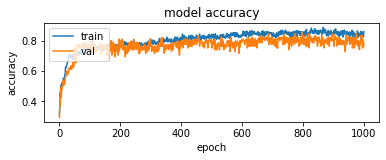

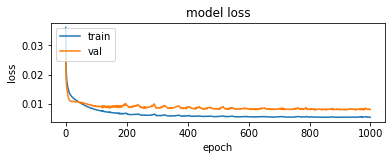

In [227]:
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

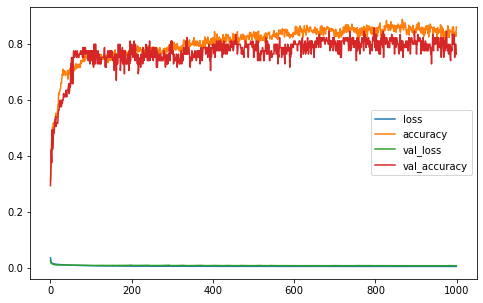

In [219]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [201]:
y_predictions = my_model2.predict(X_test)
y_predictions

9/9 [==============================] - 0s 1ms/step


array([[ 0.21535455,  0.26741135,  0.21480751, -0.13799405],
       [ 0.20132752,  0.2287987 ,  0.19492963, -0.01870159],
       [ 0.21744703,  0.19683155,  0.23088828, -0.13805005],
       ...,
       [-0.04351505, -0.0380783 , -0.03469572, -0.19092527],
       [ 0.03226277,  0.04971017,  0.04586206, -0.17763582],
       [ 0.24034023,  0.26687503,  0.21689212,  0.0159988 ]],
      dtype=float32)

In [231]:
Y_test_real = (Y_test + temperature_norm_mean) * temperature_4points_max
y_predictions_real = (y_predictions + temperature_norm_mean) * temperature_4points_max
X_test_real = (X_test + cum_dec_log10_mean) * cum_dec_log10_absmax

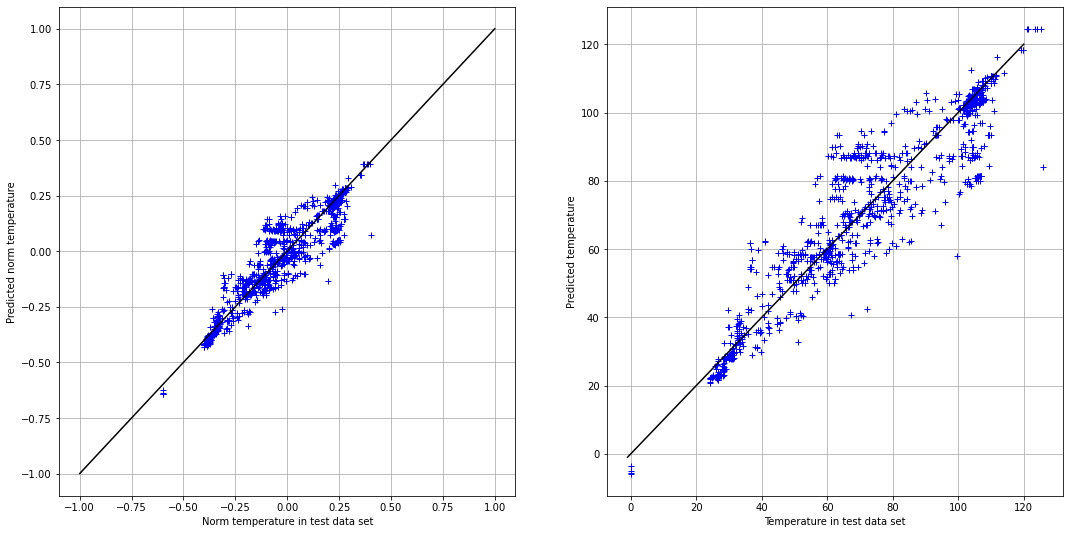

In [281]:
plt.figure(figsize=(18,9))
plt.subplot(1,2,1)
plt.plot(Y_test, y_predictions, 'b+', np.linspace(-1,1,300), np.linspace(-1,1,300), 'k-');
plt.xlabel('Norm temperature in test data set')
plt.ylabel('Predicted norm temperature')
plt.grid()
plt.subplot(1,2,2)
plt.plot(Y_test_real, y_predictions_real, 'b+', np.linspace(-1,120,300), np.linspace(-1,120,300), 'k-');
plt.xlabel('Temperature in test data set')
plt.ylabel('Predicted temperature')
plt.grid()

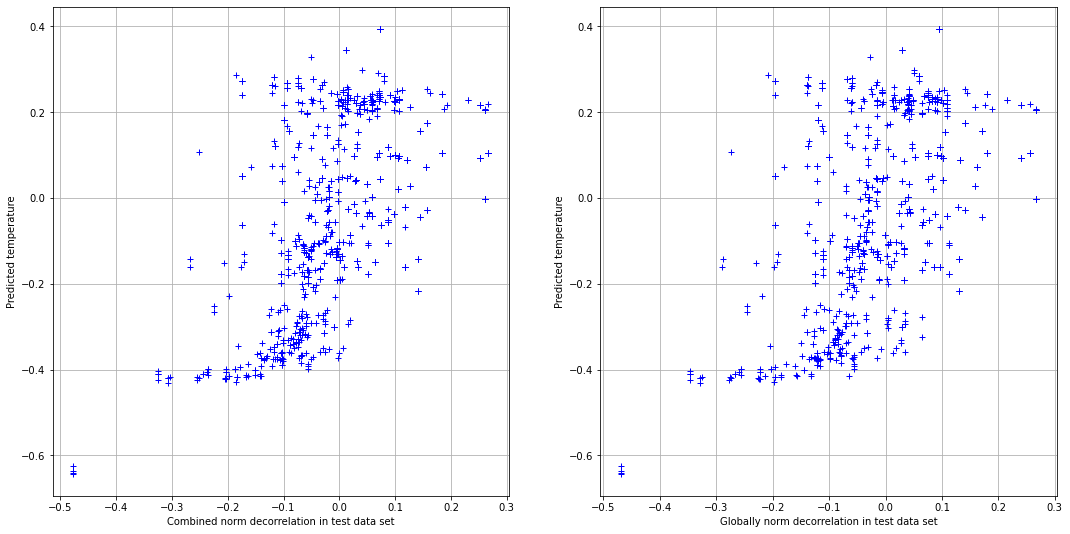

In [277]:
plt.figure(figsize=(18,9))
plt.subplot(1,2,1)
plt.plot(X_test[:,0:4], y_predictions, 'b+');
plt.xlabel('Combined norm decorrelation in test data set')
plt.ylabel('Predicted temperature')
plt.grid()
plt.subplot(1,2,2)
plt.plot(X_test[:,4:], y_predictions, 'b+');
plt.xlabel('Globally norm decorrelation in test data set')
plt.ylabel('Predicted temperature')
plt.grid()

In [224]:
np.mean(abs(y_predictions_real - Y_test_real))

6.761052989715847

In [225]:
my_model2.save('deep_decorrelation_thermometry_combined_global.h5')

## Load instantaneous data

In [4]:
cpath = os.getcwd()
path = '/mat files/instantPredictorsTempsAt4Points14Exps.mat'
all_data_inst = sio.loadmat(cpath + path)

all_data_inst.keys()

dict_keys(['__header__', '__version__', '__globals__', 'IBSAt4Points', 'decAt4points', 'dec_alteNormAt4Points', 'dec_simpleNormAt4Points', 'temperatureAt4Points'])

In [9]:
dec_4points = all_data_inst['decAt4points']
dec_global_4points = all_data_inst['dec_alteNormAt4Points']
dec_local_4points = all_data_inst['dec_simpleNormAt4Points']
IBS_4points = all_data_inst['IBSAt4Points']
temperature_4points = all_data_inst['temperatureAt4Points']

/var/folders/mq/2m2rd5h112v8vr5mhrwbt3l80000gn/T/ipykernel_47603/291169594.py:23: RuntimeWarning: divide by zero encountered in log10
  plt.hist(np.log10(dec_4points.ravel()), range=[-10,2]);
/var/folders/mq/2m2rd5h112v8vr5mhrwbt3l80000gn/T/ipykernel_47603/291169594.py:27: RuntimeWarning: divide by zero encountered in log10
  plt.hist(np.log10(dec_global_4points.ravel()), range=[-10,2]);
/var/folders/mq/2m2rd5h112v8vr5mhrwbt3l80000gn/T/ipykernel_47603/291169594.py:31: RuntimeWarning: divide by zero encountered in log10
  plt.hist(np.log10(dec_local_4points.ravel()), range=[-10,2]);
/var/folders/mq/2m2rd5h112v8vr5mhrwbt3l80000gn/T/ipykernel_47603/291169594.py:35: RuntimeWarning: divide by zero encountered in log10
  plt.hist(np.log10(IBS_4points.ravel()), range=[-10,6]);
/var/folders/mq/2m2rd5h112v8vr5mhrwbt3l80000gn/T/ipykernel_47603/291169594.py:35: RuntimeWarning: invalid value encountered in log10
  plt.hist(np.log10(IBS_4points.ravel()), range=[-10,6]);


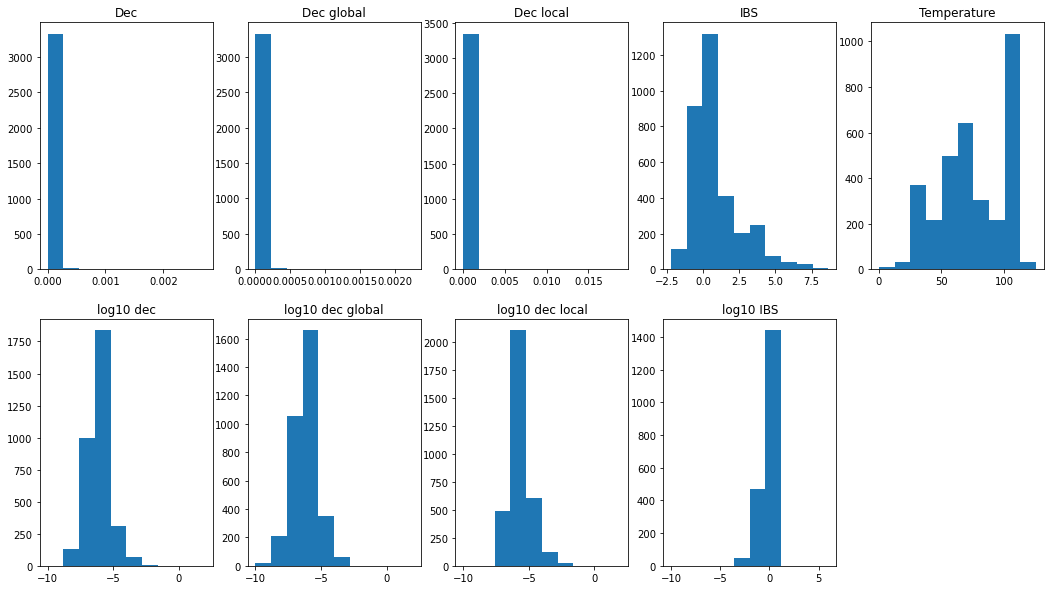

In [6]:
plt.figure(figsize=(18,10))
plt.subplot(2,5,1)
plt.hist(dec_4points.ravel());
plt.title('Dec')

plt.subplot(2,5,2)
plt.hist(dec_global_4points.ravel());
plt.title('Dec global')

plt.subplot(2,5,3)
plt.hist(dec_local_4points.ravel());
plt.title('Dec local')

plt.subplot(2,5,4)
plt.hist(IBS_4points.ravel());
plt.title('IBS')

plt.subplot(2,5,5)
plt.hist(temperature_4points.ravel());
plt.title('Temperature')

plt.subplot(2,5,6)
plt.hist(np.log10(dec_4points.ravel()), range=[-10,2]);
plt.title('log10 dec')

plt.subplot(2,5,7)
plt.hist(np.log10(dec_global_4points.ravel()), range=[-10,2]);
plt.title('log10 dec global')

plt.subplot(2,5,8)
plt.hist(np.log10(dec_local_4points.ravel()), range=[-10,2]);
plt.title('log10 dec local')

plt.subplot(2,5,9)
plt.hist(np.log10(IBS_4points.ravel()), range=[-10,6]);
plt.title('log10 IBS');



### Clean and normalize the data

In [10]:
dec_4points = np.transpose(dec_4points,[0,2,1])
dec_global_4points = np.transpose(dec_global_4points,[0,2,1])
temperature_4points = np.transpose(temperature_4points,[0,2,1])

dec_4points.shape

(14, 60, 4)

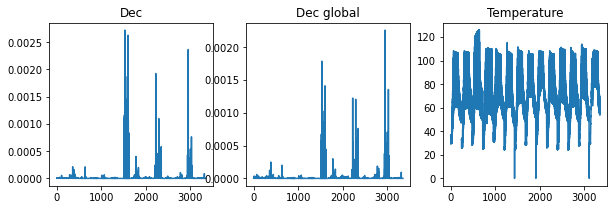

In [11]:
plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plt.plot(dec_4points.ravel())
plt.title('Dec');
plt.subplot(1,3,2)
plt.plot(dec_global_4points.ravel())
plt.title('Dec global');
plt.subplot(1,3,3)
plt.plot(temperature_4points.ravel())
plt.title('Temperature');

In [12]:
dec_4points = dec_4points.reshape([14*60,4])
dec_global_4points = dec_global_4points.reshape([14*60,4])
temperature_4points = temperature_4points.reshape([14*60,4])
temperature_4points.shape

(840, 4)

In [13]:
# Remove nans
dec_4points = dec_4points[~np.isnan(temperature_4points)].reshape([-1,4])
dec_global_4points = dec_global_4points[~np.isnan(temperature_4points)].reshape([-1,4])
temperature_4points = temperature_4points[~np.isnan(temperature_4points)].reshape([-1,4])

/var/folders/mq/2m2rd5h112v8vr5mhrwbt3l80000gn/T/ipykernel_47603/704176756.py:1: RuntimeWarning: divide by zero encountered in log10
  dec_log10 = np.log10(dec_4points)
/var/folders/mq/2m2rd5h112v8vr5mhrwbt3l80000gn/T/ipykernel_47603/704176756.py:9: RuntimeWarning: divide by zero encountered in log10
  dec_global_log10 = np.log10(dec_global_4points)


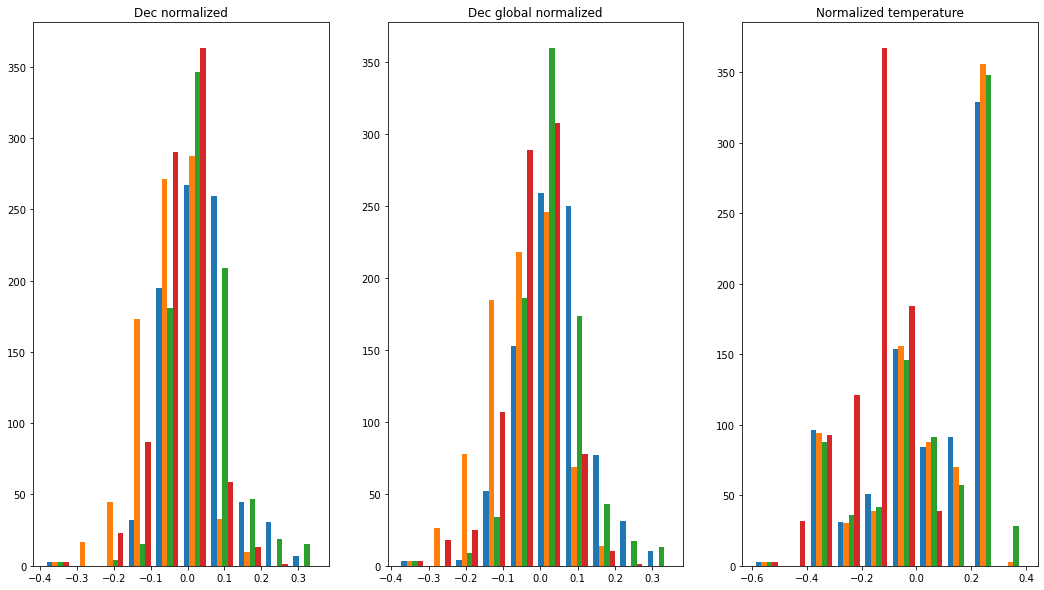

In [14]:
dec_log10 = np.log10(dec_4points)
dec_log10 = np.nan_to_num(dec_log10,posinf=0, neginf=-10)
dec_log10_absmax = abs(dec_log10).max()
dec_log10 = dec_log10 / dec_log10_absmax
dec_log10_mean = np.mean(dec_log10)
dec_log10 = dec_log10 - dec_log10_mean


dec_global_log10 = np.log10(dec_global_4points)
dec_global_log10 = np.nan_to_num(dec_global_log10,posinf=0, neginf=-10)
dec_global_log10_absmax =  abs(dec_global_log10).max()
dec_global_log10 = dec_global_log10 / dec_global_log10_absmax
dec_global_log10_mean = np.mean(dec_global_log10)
dec_global_log10 = dec_global_log10 - dec_global_log10_mean

temperature_4points_max = temperature_4points.max()
temperature_norm = temperature_4points / temperature_4points_max
temperature_norm_mean = temperature_norm.mean()
temperature_norm = temperature_norm - temperature_norm_mean
temperature_norm.min()

plt.figure(figsize=(18,10))
plt.subplot(1,3,1)
plt.hist(dec_log10);
plt.title('Dec normalized');

plt.subplot(1,3,2)
plt.hist(dec_global_log10);
plt.title('Dec global normalized');

plt.subplot(1,3,3)
plt.hist(temperature_norm);
plt.title('Normalized temperature');

In [15]:
dec_comb_glob = np.concatenate((dec_log10, dec_global_log10), axis=1)
dec_comb_glob.shape

(839, 8)

In [16]:
X_train_inst, X_test_inst, Y_train_inst, Y_test_inst = train_test_split(dec_comb_glob, temperature_norm, test_size=0.33, random_state=42)

Y_train_inst.shape

(562, 4)

### Neural network architecture for instantaneous combined and globally norm. decorr.

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 64)                576       
                                                                 
 dense_25 (Dense)            (None, 128)               8320      
                                                                 
 dense_26 (Dense)            (None, 64)                8256      
                                                                 
 dense_27 (Dense)            (None, 4)                 260       
                                                                 
Total params: 17,412
Trainable params: 17,412
Non-trainable params: 0
_________________________________________________________________
None


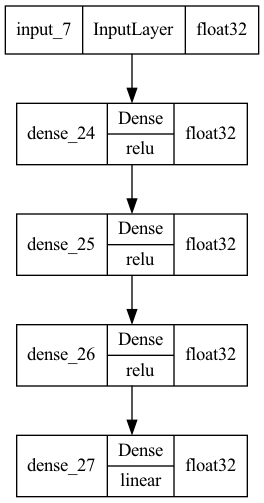

In [335]:
my_model3 = keras.Sequential([
    keras.layers.InputLayer(input_shape=(8,)),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=4)
])

print(my_model3.summary())

plot_model(my_model3, show_dtype=True, show_layer_activations=True)

In [336]:
my_model3.compile(optimizer='adam', 
              loss=tf.losses.MeanSquaredError(),
              metrics=['accuracy'])

history3 = my_model3.fit(
    X_train_inst, 
    Y_train_inst,
    batch_size=50,
    epochs=1000, 
    verbose=2,
    validation_split=0.15,
    shuffle=False)

Epoch 1/1000
10/10 - 1s - loss: 0.0369 - accuracy: 0.2914 - val_loss: 0.0283 - val_accuracy: 0.3412 - 644ms/epoch - 64ms/step
Epoch 2/1000
10/10 - 0s - loss: 0.0268 - accuracy: 0.4340 - val_loss: 0.0232 - val_accuracy: 0.5176 - 40ms/epoch - 4ms/step
Epoch 3/1000
10/10 - 0s - loss: 0.0224 - accuracy: 0.5409 - val_loss: 0.0213 - val_accuracy: 0.4235 - 39ms/epoch - 4ms/step
Epoch 4/1000
10/10 - 0s - loss: 0.0197 - accuracy: 0.3648 - val_loss: 0.0201 - val_accuracy: 0.3529 - 43ms/epoch - 4ms/step
Epoch 5/1000
10/10 - 0s - loss: 0.0183 - accuracy: 0.4885 - val_loss: 0.0195 - val_accuracy: 0.4588 - 41ms/epoch - 4ms/step
Epoch 6/1000
10/10 - 0s - loss: 0.0174 - accuracy: 0.4843 - val_loss: 0.0190 - val_accuracy: 0.6000 - 40ms/epoch - 4ms/step
Epoch 7/1000
10/10 - 0s - loss: 0.0170 - accuracy: 0.5241 - val_loss: 0.0185 - val_accuracy: 0.5176 - 40ms/epoch - 4ms/step
Epoch 8/1000
10/10 - 0s - loss: 0.0166 - accuracy: 0.4990 - val_loss: 0.0182 - val_accuracy: 0.5294 - 39ms/epoch - 4ms/step
Epoch 

Epoch 67/1000
10/10 - 0s - loss: 0.0082 - accuracy: 0.6080 - val_loss: 0.0139 - val_accuracy: 0.6000 - 38ms/epoch - 4ms/step
Epoch 68/1000
10/10 - 0s - loss: 0.0081 - accuracy: 0.6184 - val_loss: 0.0139 - val_accuracy: 0.5765 - 37ms/epoch - 4ms/step
Epoch 69/1000
10/10 - 0s - loss: 0.0080 - accuracy: 0.6059 - val_loss: 0.0139 - val_accuracy: 0.6000 - 37ms/epoch - 4ms/step
Epoch 70/1000
10/10 - 0s - loss: 0.0079 - accuracy: 0.6184 - val_loss: 0.0139 - val_accuracy: 0.6000 - 38ms/epoch - 4ms/step
Epoch 71/1000
10/10 - 0s - loss: 0.0079 - accuracy: 0.6080 - val_loss: 0.0139 - val_accuracy: 0.5882 - 37ms/epoch - 4ms/step
Epoch 72/1000
10/10 - 0s - loss: 0.0078 - accuracy: 0.6205 - val_loss: 0.0138 - val_accuracy: 0.6000 - 38ms/epoch - 4ms/step
Epoch 73/1000
10/10 - 0s - loss: 0.0077 - accuracy: 0.5996 - val_loss: 0.0139 - val_accuracy: 0.6000 - 38ms/epoch - 4ms/step
Epoch 74/1000
10/10 - 0s - loss: 0.0076 - accuracy: 0.6101 - val_loss: 0.0139 - val_accuracy: 0.5882 - 38ms/epoch - 4ms/step


Epoch 133/1000
10/10 - 0s - loss: 0.0047 - accuracy: 0.6478 - val_loss: 0.0140 - val_accuracy: 0.6706 - 38ms/epoch - 4ms/step
Epoch 134/1000
10/10 - 0s - loss: 0.0048 - accuracy: 0.6268 - val_loss: 0.0144 - val_accuracy: 0.6706 - 37ms/epoch - 4ms/step
Epoch 135/1000
10/10 - 0s - loss: 0.0047 - accuracy: 0.6184 - val_loss: 0.0141 - val_accuracy: 0.6941 - 39ms/epoch - 4ms/step
Epoch 136/1000
10/10 - 0s - loss: 0.0047 - accuracy: 0.6373 - val_loss: 0.0146 - val_accuracy: 0.6588 - 39ms/epoch - 4ms/step
Epoch 137/1000
10/10 - 0s - loss: 0.0046 - accuracy: 0.6394 - val_loss: 0.0140 - val_accuracy: 0.6824 - 38ms/epoch - 4ms/step
Epoch 138/1000
10/10 - 0s - loss: 0.0046 - accuracy: 0.6143 - val_loss: 0.0144 - val_accuracy: 0.6706 - 41ms/epoch - 4ms/step
Epoch 139/1000
10/10 - 0s - loss: 0.0046 - accuracy: 0.6457 - val_loss: 0.0142 - val_accuracy: 0.6824 - 39ms/epoch - 4ms/step
Epoch 140/1000
10/10 - 0s - loss: 0.0045 - accuracy: 0.6164 - val_loss: 0.0142 - val_accuracy: 0.6706 - 38ms/epoch - 4

10/10 - 0s - loss: 0.0038 - accuracy: 0.6751 - val_loss: 0.0142 - val_accuracy: 0.6824 - 37ms/epoch - 4ms/step
Epoch 199/1000
10/10 - 0s - loss: 0.0038 - accuracy: 0.6792 - val_loss: 0.0140 - val_accuracy: 0.6588 - 37ms/epoch - 4ms/step
Epoch 200/1000
10/10 - 0s - loss: 0.0035 - accuracy: 0.6122 - val_loss: 0.0141 - val_accuracy: 0.6588 - 38ms/epoch - 4ms/step
Epoch 201/1000
10/10 - 0s - loss: 0.0039 - accuracy: 0.6855 - val_loss: 0.0146 - val_accuracy: 0.7059 - 37ms/epoch - 4ms/step
Epoch 202/1000
10/10 - 0s - loss: 0.0037 - accuracy: 0.6499 - val_loss: 0.0137 - val_accuracy: 0.6706 - 37ms/epoch - 4ms/step
Epoch 203/1000
10/10 - 0s - loss: 0.0036 - accuracy: 0.6394 - val_loss: 0.0142 - val_accuracy: 0.6706 - 37ms/epoch - 4ms/step
Epoch 204/1000
10/10 - 0s - loss: 0.0035 - accuracy: 0.6792 - val_loss: 0.0138 - val_accuracy: 0.6706 - 37ms/epoch - 4ms/step
Epoch 205/1000
10/10 - 0s - loss: 0.0034 - accuracy: 0.6394 - val_loss: 0.0136 - val_accuracy: 0.6235 - 38ms/epoch - 4ms/step
Epoch 2

Epoch 264/1000
10/10 - 0s - loss: 0.0034 - accuracy: 0.6394 - val_loss: 0.0137 - val_accuracy: 0.6471 - 38ms/epoch - 4ms/step
Epoch 265/1000
10/10 - 0s - loss: 0.0029 - accuracy: 0.6709 - val_loss: 0.0143 - val_accuracy: 0.6941 - 37ms/epoch - 4ms/step
Epoch 266/1000
10/10 - 0s - loss: 0.0031 - accuracy: 0.6751 - val_loss: 0.0144 - val_accuracy: 0.6824 - 39ms/epoch - 4ms/step
Epoch 267/1000
10/10 - 0s - loss: 0.0032 - accuracy: 0.6373 - val_loss: 0.0136 - val_accuracy: 0.6941 - 38ms/epoch - 4ms/step
Epoch 268/1000
10/10 - 0s - loss: 0.0030 - accuracy: 0.6625 - val_loss: 0.0142 - val_accuracy: 0.6941 - 40ms/epoch - 4ms/step
Epoch 269/1000
10/10 - 0s - loss: 0.0030 - accuracy: 0.6813 - val_loss: 0.0145 - val_accuracy: 0.6824 - 38ms/epoch - 4ms/step
Epoch 270/1000
10/10 - 0s - loss: 0.0029 - accuracy: 0.6478 - val_loss: 0.0141 - val_accuracy: 0.6235 - 38ms/epoch - 4ms/step
Epoch 271/1000
10/10 - 0s - loss: 0.0031 - accuracy: 0.6667 - val_loss: 0.0143 - val_accuracy: 0.6824 - 39ms/epoch - 4

10/10 - 0s - loss: 0.0022 - accuracy: 0.6688 - val_loss: 0.0137 - val_accuracy: 0.6353 - 37ms/epoch - 4ms/step
Epoch 330/1000
10/10 - 0s - loss: 0.0021 - accuracy: 0.6604 - val_loss: 0.0140 - val_accuracy: 0.6706 - 38ms/epoch - 4ms/step
Epoch 331/1000
10/10 - 0s - loss: 0.0021 - accuracy: 0.6939 - val_loss: 0.0142 - val_accuracy: 0.6588 - 37ms/epoch - 4ms/step
Epoch 332/1000
10/10 - 0s - loss: 0.0023 - accuracy: 0.6688 - val_loss: 0.0142 - val_accuracy: 0.6353 - 38ms/epoch - 4ms/step
Epoch 333/1000
10/10 - 0s - loss: 0.0023 - accuracy: 0.6646 - val_loss: 0.0140 - val_accuracy: 0.6588 - 38ms/epoch - 4ms/step
Epoch 334/1000
10/10 - 0s - loss: 0.0022 - accuracy: 0.6834 - val_loss: 0.0143 - val_accuracy: 0.6471 - 39ms/epoch - 4ms/step
Epoch 335/1000
10/10 - 0s - loss: 0.0025 - accuracy: 0.6625 - val_loss: 0.0141 - val_accuracy: 0.6235 - 39ms/epoch - 4ms/step
Epoch 336/1000
10/10 - 0s - loss: 0.0024 - accuracy: 0.6415 - val_loss: 0.0140 - val_accuracy: 0.6588 - 47ms/epoch - 5ms/step
Epoch 3

Epoch 395/1000
10/10 - 0s - loss: 0.0021 - accuracy: 0.6751 - val_loss: 0.0142 - val_accuracy: 0.6706 - 39ms/epoch - 4ms/step
Epoch 396/1000
10/10 - 0s - loss: 0.0020 - accuracy: 0.6939 - val_loss: 0.0148 - val_accuracy: 0.6353 - 40ms/epoch - 4ms/step
Epoch 397/1000
10/10 - 0s - loss: 0.0024 - accuracy: 0.6834 - val_loss: 0.0148 - val_accuracy: 0.6353 - 39ms/epoch - 4ms/step
Epoch 398/1000
10/10 - 0s - loss: 0.0024 - accuracy: 0.6771 - val_loss: 0.0146 - val_accuracy: 0.6588 - 37ms/epoch - 4ms/step
Epoch 399/1000
10/10 - 0s - loss: 0.0023 - accuracy: 0.6918 - val_loss: 0.0151 - val_accuracy: 0.6235 - 38ms/epoch - 4ms/step
Epoch 400/1000
10/10 - 0s - loss: 0.0029 - accuracy: 0.6730 - val_loss: 0.0139 - val_accuracy: 0.6235 - 38ms/epoch - 4ms/step
Epoch 401/1000
10/10 - 0s - loss: 0.0021 - accuracy: 0.6792 - val_loss: 0.0146 - val_accuracy: 0.6471 - 38ms/epoch - 4ms/step
Epoch 402/1000
10/10 - 0s - loss: 0.0022 - accuracy: 0.6939 - val_loss: 0.0149 - val_accuracy: 0.6706 - 39ms/epoch - 4

10/10 - 0s - loss: 0.0018 - accuracy: 0.6897 - val_loss: 0.0150 - val_accuracy: 0.6706 - 38ms/epoch - 4ms/step
Epoch 461/1000
10/10 - 0s - loss: 0.0018 - accuracy: 0.6939 - val_loss: 0.0151 - val_accuracy: 0.6588 - 39ms/epoch - 4ms/step
Epoch 462/1000
10/10 - 0s - loss: 0.0017 - accuracy: 0.6960 - val_loss: 0.0148 - val_accuracy: 0.6706 - 38ms/epoch - 4ms/step
Epoch 463/1000
10/10 - 0s - loss: 0.0016 - accuracy: 0.6834 - val_loss: 0.0145 - val_accuracy: 0.6471 - 38ms/epoch - 4ms/step
Epoch 464/1000
10/10 - 0s - loss: 0.0015 - accuracy: 0.6960 - val_loss: 0.0151 - val_accuracy: 0.6471 - 38ms/epoch - 4ms/step
Epoch 465/1000
10/10 - 0s - loss: 0.0018 - accuracy: 0.6981 - val_loss: 0.0147 - val_accuracy: 0.6471 - 37ms/epoch - 4ms/step
Epoch 466/1000
10/10 - 0s - loss: 0.0018 - accuracy: 0.6813 - val_loss: 0.0153 - val_accuracy: 0.6706 - 37ms/epoch - 4ms/step
Epoch 467/1000
10/10 - 0s - loss: 0.0018 - accuracy: 0.6960 - val_loss: 0.0152 - val_accuracy: 0.6588 - 37ms/epoch - 4ms/step
Epoch 4

Epoch 526/1000
10/10 - 0s - loss: 0.0023 - accuracy: 0.7212 - val_loss: 0.0161 - val_accuracy: 0.7059 - 38ms/epoch - 4ms/step
Epoch 527/1000
10/10 - 0s - loss: 0.0022 - accuracy: 0.7002 - val_loss: 0.0153 - val_accuracy: 0.6824 - 37ms/epoch - 4ms/step
Epoch 528/1000
10/10 - 0s - loss: 0.0019 - accuracy: 0.7023 - val_loss: 0.0154 - val_accuracy: 0.6471 - 38ms/epoch - 4ms/step
Epoch 529/1000
10/10 - 0s - loss: 0.0019 - accuracy: 0.6876 - val_loss: 0.0150 - val_accuracy: 0.6353 - 37ms/epoch - 4ms/step
Epoch 530/1000
10/10 - 0s - loss: 0.0017 - accuracy: 0.6918 - val_loss: 0.0152 - val_accuracy: 0.6706 - 38ms/epoch - 4ms/step
Epoch 531/1000
10/10 - 0s - loss: 0.0019 - accuracy: 0.7065 - val_loss: 0.0163 - val_accuracy: 0.6941 - 40ms/epoch - 4ms/step
Epoch 532/1000
10/10 - 0s - loss: 0.0019 - accuracy: 0.7149 - val_loss: 0.0166 - val_accuracy: 0.6824 - 39ms/epoch - 4ms/step
Epoch 533/1000
10/10 - 0s - loss: 0.0025 - accuracy: 0.7044 - val_loss: 0.0156 - val_accuracy: 0.6941 - 38ms/epoch - 4

10/10 - 0s - loss: 0.0022 - accuracy: 0.6897 - val_loss: 0.0151 - val_accuracy: 0.6353 - 41ms/epoch - 4ms/step
Epoch 592/1000
10/10 - 0s - loss: 0.0020 - accuracy: 0.6939 - val_loss: 0.0140 - val_accuracy: 0.6353 - 39ms/epoch - 4ms/step
Epoch 593/1000
10/10 - 0s - loss: 0.0018 - accuracy: 0.6918 - val_loss: 0.0136 - val_accuracy: 0.6471 - 40ms/epoch - 4ms/step
Epoch 594/1000
10/10 - 0s - loss: 0.0016 - accuracy: 0.6876 - val_loss: 0.0137 - val_accuracy: 0.6471 - 39ms/epoch - 4ms/step
Epoch 595/1000
10/10 - 0s - loss: 0.0014 - accuracy: 0.6918 - val_loss: 0.0138 - val_accuracy: 0.6588 - 38ms/epoch - 4ms/step
Epoch 596/1000
10/10 - 0s - loss: 0.0014 - accuracy: 0.6834 - val_loss: 0.0136 - val_accuracy: 0.6588 - 38ms/epoch - 4ms/step
Epoch 597/1000
10/10 - 0s - loss: 0.0013 - accuracy: 0.7002 - val_loss: 0.0139 - val_accuracy: 0.6353 - 39ms/epoch - 4ms/step
Epoch 598/1000
10/10 - 0s - loss: 0.0014 - accuracy: 0.6981 - val_loss: 0.0145 - val_accuracy: 0.6353 - 40ms/epoch - 4ms/step
Epoch 5

Epoch 657/1000
10/10 - 0s - loss: 0.0013 - accuracy: 0.7044 - val_loss: 0.0136 - val_accuracy: 0.6706 - 39ms/epoch - 4ms/step
Epoch 658/1000
10/10 - 0s - loss: 0.0013 - accuracy: 0.7065 - val_loss: 0.0140 - val_accuracy: 0.6824 - 39ms/epoch - 4ms/step
Epoch 659/1000
10/10 - 0s - loss: 0.0013 - accuracy: 0.7002 - val_loss: 0.0136 - val_accuracy: 0.6824 - 40ms/epoch - 4ms/step
Epoch 660/1000
10/10 - 0s - loss: 0.0013 - accuracy: 0.6981 - val_loss: 0.0139 - val_accuracy: 0.6824 - 38ms/epoch - 4ms/step
Epoch 661/1000
10/10 - 0s - loss: 0.0013 - accuracy: 0.6960 - val_loss: 0.0144 - val_accuracy: 0.6706 - 39ms/epoch - 4ms/step
Epoch 662/1000
10/10 - 0s - loss: 0.0013 - accuracy: 0.7002 - val_loss: 0.0152 - val_accuracy: 0.6235 - 38ms/epoch - 4ms/step
Epoch 663/1000
10/10 - 0s - loss: 0.0014 - accuracy: 0.7002 - val_loss: 0.0162 - val_accuracy: 0.6118 - 38ms/epoch - 4ms/step
Epoch 664/1000
10/10 - 0s - loss: 0.0015 - accuracy: 0.7128 - val_loss: 0.0174 - val_accuracy: 0.6118 - 38ms/epoch - 4

10/10 - 0s - loss: 0.0015 - accuracy: 0.7149 - val_loss: 0.0137 - val_accuracy: 0.6824 - 37ms/epoch - 4ms/step
Epoch 723/1000
10/10 - 0s - loss: 0.0013 - accuracy: 0.7212 - val_loss: 0.0142 - val_accuracy: 0.6588 - 37ms/epoch - 4ms/step
Epoch 724/1000
10/10 - 0s - loss: 0.0013 - accuracy: 0.7191 - val_loss: 0.0139 - val_accuracy: 0.6824 - 38ms/epoch - 4ms/step
Epoch 725/1000
10/10 - 0s - loss: 0.0014 - accuracy: 0.7170 - val_loss: 0.0136 - val_accuracy: 0.6824 - 38ms/epoch - 4ms/step
Epoch 726/1000
10/10 - 0s - loss: 0.0013 - accuracy: 0.7191 - val_loss: 0.0140 - val_accuracy: 0.6353 - 38ms/epoch - 4ms/step
Epoch 727/1000
10/10 - 0s - loss: 0.0013 - accuracy: 0.6897 - val_loss: 0.0158 - val_accuracy: 0.6353 - 37ms/epoch - 4ms/step
Epoch 728/1000
10/10 - 0s - loss: 0.0014 - accuracy: 0.7107 - val_loss: 0.0176 - val_accuracy: 0.6353 - 38ms/epoch - 4ms/step
Epoch 729/1000
10/10 - 0s - loss: 0.0016 - accuracy: 0.7170 - val_loss: 0.0171 - val_accuracy: 0.6471 - 37ms/epoch - 4ms/step
Epoch 7

Epoch 788/1000
10/10 - 0s - loss: 0.0014 - accuracy: 0.7212 - val_loss: 0.0175 - val_accuracy: 0.6353 - 37ms/epoch - 4ms/step
Epoch 789/1000
10/10 - 0s - loss: 0.0015 - accuracy: 0.7233 - val_loss: 0.0166 - val_accuracy: 0.6353 - 38ms/epoch - 4ms/step
Epoch 790/1000
10/10 - 0s - loss: 0.0015 - accuracy: 0.7254 - val_loss: 0.0151 - val_accuracy: 0.6588 - 38ms/epoch - 4ms/step
Epoch 791/1000
10/10 - 0s - loss: 0.0014 - accuracy: 0.7149 - val_loss: 0.0138 - val_accuracy: 0.6588 - 38ms/epoch - 4ms/step
Epoch 792/1000
10/10 - 0s - loss: 0.0012 - accuracy: 0.7296 - val_loss: 0.0139 - val_accuracy: 0.6471 - 39ms/epoch - 4ms/step
Epoch 793/1000
10/10 - 0s - loss: 0.0013 - accuracy: 0.7233 - val_loss: 0.0141 - val_accuracy: 0.6588 - 38ms/epoch - 4ms/step
Epoch 794/1000
10/10 - 0s - loss: 0.0012 - accuracy: 0.7212 - val_loss: 0.0144 - val_accuracy: 0.6706 - 37ms/epoch - 4ms/step
Epoch 795/1000
10/10 - 0s - loss: 0.0013 - accuracy: 0.7400 - val_loss: 0.0143 - val_accuracy: 0.6824 - 38ms/epoch - 4

10/10 - 0s - loss: 0.0012 - accuracy: 0.7317 - val_loss: 0.0135 - val_accuracy: 0.6824 - 38ms/epoch - 4ms/step
Epoch 854/1000
10/10 - 0s - loss: 0.0010 - accuracy: 0.7379 - val_loss: 0.0141 - val_accuracy: 0.6588 - 39ms/epoch - 4ms/step
Epoch 855/1000
10/10 - 0s - loss: 9.8815e-04 - accuracy: 0.7442 - val_loss: 0.0143 - val_accuracy: 0.6706 - 37ms/epoch - 4ms/step
Epoch 856/1000
10/10 - 0s - loss: 0.0012 - accuracy: 0.7526 - val_loss: 0.0144 - val_accuracy: 0.6471 - 38ms/epoch - 4ms/step
Epoch 857/1000
10/10 - 0s - loss: 0.0011 - accuracy: 0.7505 - val_loss: 0.0146 - val_accuracy: 0.6824 - 37ms/epoch - 4ms/step
Epoch 858/1000
10/10 - 0s - loss: 0.0011 - accuracy: 0.7421 - val_loss: 0.0165 - val_accuracy: 0.6588 - 38ms/epoch - 4ms/step
Epoch 859/1000
10/10 - 0s - loss: 0.0012 - accuracy: 0.7338 - val_loss: 0.0174 - val_accuracy: 0.6588 - 38ms/epoch - 4ms/step
Epoch 860/1000
10/10 - 0s - loss: 0.0013 - accuracy: 0.7442 - val_loss: 0.0156 - val_accuracy: 0.6235 - 38ms/epoch - 4ms/step
Epo

Epoch 918/1000
10/10 - 0s - loss: 0.0011 - accuracy: 0.7484 - val_loss: 0.0155 - val_accuracy: 0.6706 - 38ms/epoch - 4ms/step
Epoch 919/1000
10/10 - 0s - loss: 0.0012 - accuracy: 0.7254 - val_loss: 0.0142 - val_accuracy: 0.6824 - 38ms/epoch - 4ms/step
Epoch 920/1000
10/10 - 0s - loss: 0.0011 - accuracy: 0.7338 - val_loss: 0.0138 - val_accuracy: 0.6471 - 39ms/epoch - 4ms/step
Epoch 921/1000
10/10 - 0s - loss: 9.8880e-04 - accuracy: 0.7421 - val_loss: 0.0141 - val_accuracy: 0.6235 - 38ms/epoch - 4ms/step
Epoch 922/1000
10/10 - 0s - loss: 0.0010 - accuracy: 0.7442 - val_loss: 0.0141 - val_accuracy: 0.6471 - 37ms/epoch - 4ms/step
Epoch 923/1000
10/10 - 0s - loss: 0.0012 - accuracy: 0.7442 - val_loss: 0.0144 - val_accuracy: 0.6118 - 38ms/epoch - 4ms/step
Epoch 924/1000
10/10 - 0s - loss: 0.0012 - accuracy: 0.7652 - val_loss: 0.0148 - val_accuracy: 0.6706 - 37ms/epoch - 4ms/step
Epoch 925/1000
10/10 - 0s - loss: 0.0011 - accuracy: 0.7505 - val_loss: 0.0164 - val_accuracy: 0.6588 - 37ms/epoch

Epoch 983/1000
10/10 - 0s - loss: 9.3463e-04 - accuracy: 0.7547 - val_loss: 0.0150 - val_accuracy: 0.6706 - 38ms/epoch - 4ms/step
Epoch 984/1000
10/10 - 0s - loss: 8.4427e-04 - accuracy: 0.7505 - val_loss: 0.0133 - val_accuracy: 0.6588 - 39ms/epoch - 4ms/step
Epoch 985/1000
10/10 - 0s - loss: 8.5312e-04 - accuracy: 0.7526 - val_loss: 0.0145 - val_accuracy: 0.6706 - 38ms/epoch - 4ms/step
Epoch 986/1000
10/10 - 0s - loss: 7.9157e-04 - accuracy: 0.7652 - val_loss: 0.0136 - val_accuracy: 0.6235 - 38ms/epoch - 4ms/step
Epoch 987/1000
10/10 - 0s - loss: 8.5386e-04 - accuracy: 0.7610 - val_loss: 0.0142 - val_accuracy: 0.6235 - 38ms/epoch - 4ms/step
Epoch 988/1000
10/10 - 0s - loss: 9.0568e-04 - accuracy: 0.7463 - val_loss: 0.0143 - val_accuracy: 0.6235 - 38ms/epoch - 4ms/step
Epoch 989/1000
10/10 - 0s - loss: 9.4888e-04 - accuracy: 0.7526 - val_loss: 0.0150 - val_accuracy: 0.6824 - 37ms/epoch - 4ms/step
Epoch 990/1000
10/10 - 0s - loss: 8.9332e-04 - accuracy: 0.7589 - val_loss: 0.0161 - val_a

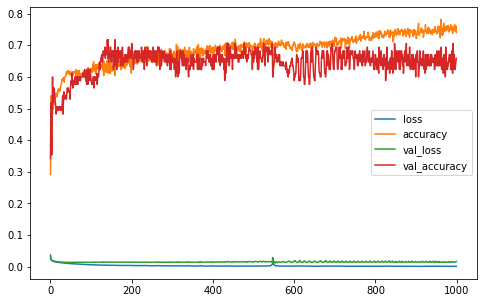

In [337]:
import pandas as pd
pd.DataFrame(history3.history).plot(figsize=(8,5))
plt.show()

In [309]:
y_predictions_inst = my_model3.predict(X_test_inst)
y_predictions_inst

9/9 [==============================] - 0s 811us/step


array([[ 0.2200671 ,  0.27941886,  0.2545357 , -0.11036883],
       [ 0.17130968,  0.19194007,  0.13245504, -0.02060629],
       [ 0.18088247,  0.14001442,  0.19049342, -0.18406817],
       ...,
       [ 0.01419301,  0.02175928,  0.01586507, -0.15959808],
       [-0.08925724, -0.07491223, -0.06452543, -0.18642223],
       [ 0.23955739,  0.27343082,  0.22065197,  0.01554482]],
      dtype=float32)

In [310]:
Y_test_inst_real = (Y_test_inst + temperature_norm_mean) * temperature_4points_max
y_predictions_inst_real = (y_predictions_inst + temperature_norm_mean) * temperature_4points_max
X_test_inst_real = (X_test_inst + dec_log10_mean) * dec_log10_absmax

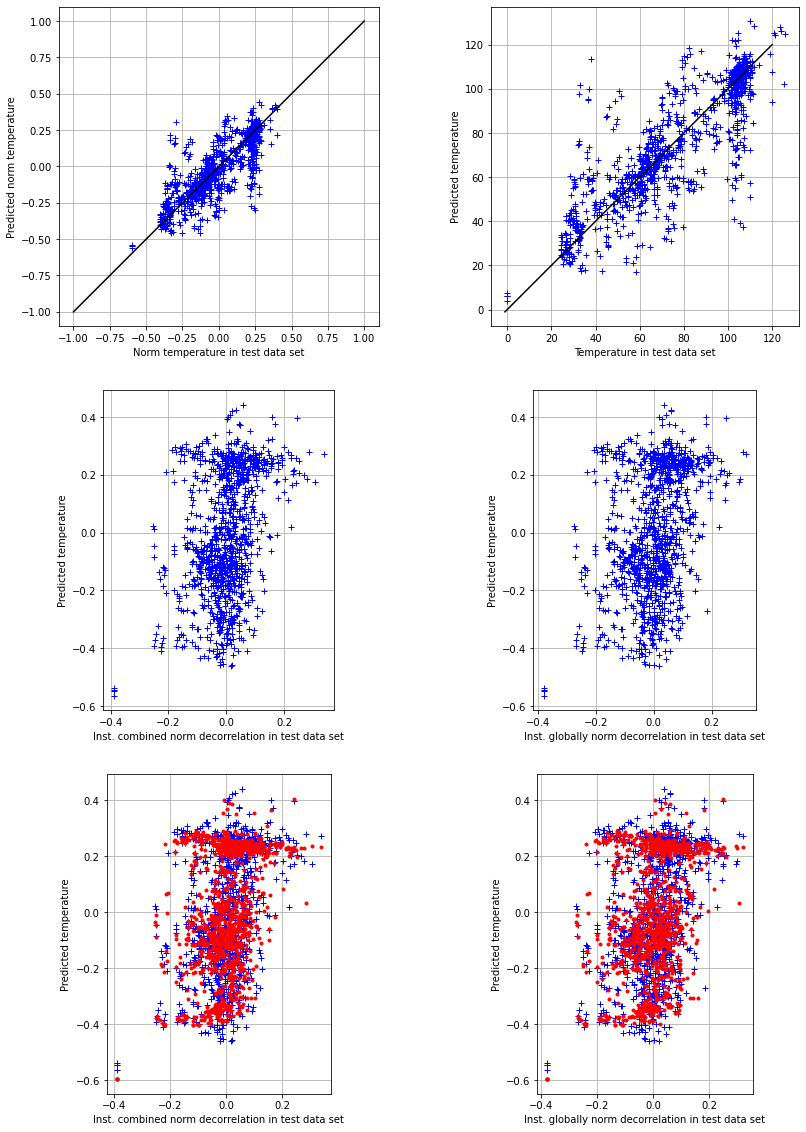

In [322]:
plt.figure(figsize=(14,20))
plt.subplot(321, aspect='equal')
plt.plot(Y_test_inst, y_predictions_inst, 'b+', np.linspace(-1,1,300), np.linspace(-1,1,300), 'k-');
plt.xlabel('Norm temperature in test data set')
plt.ylabel('Predicted norm temperature')
plt.grid()
plt.subplot(322, aspect='equal')
plt.plot(Y_test_inst_real, y_predictions_inst_real, 'b+', np.linspace(-1,120,300), np.linspace(-1,120,300), 'k-');
plt.xlabel('Temperature in test data set')
plt.ylabel('Predicted temperature')
plt.grid()

plt.subplot(323, aspect='equal')
plt.plot(X_test_inst[:,0:4], y_predictions_inst, 'b+');
plt.xlabel('Inst. combined norm decorrelation in test data set')
plt.ylabel('Predicted temperature')
plt.grid()
plt.subplot(324, aspect='equal')
plt.plot(X_test_inst[:,4:], y_predictions_inst, 'b+');
plt.xlabel('Inst. globally norm decorrelation in test data set')
plt.ylabel('Predicted temperature')
plt.grid()

plt.subplot(325, aspect='equal')
plt.plot(X_test_inst[:,0:4], y_predictions_inst, 'b+', X_test_inst[:,0:4], Y_test_inst, 'r.');
plt.xlabel('Inst. combined norm decorrelation in test data set')
plt.ylabel('Predicted temperature')
plt.grid()
plt.subplot(326, aspect='equal')
plt.plot(X_test_inst[:,4:], y_predictions_inst, 'b+', X_test_inst[:,4:], Y_test_inst, 'r.');
plt.xlabel('Inst. globally norm decorrelation in test data set')
plt.ylabel('Predicted temperature')
plt.grid()

In [328]:
np.sum(abs(y_predictions_inst_real - Y_test_inst_real))

10880.912464872996

In [323]:
my_model3.save('deep_decorrelation_thermometry_instant_combined_global.h5')

In [327]:
np.sqrt(np.square(Y_test_inst_real-y_predictions_inst_real).mean()) 

14.96687570068716

In [ ]:
np.sum()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 64)                576       
                                                                 
 dense_37 (Dense)            (None, 128)               8320      
                                                                 
 dense_38 (Dense)            (None, 64)                8256      
                                                                 
 dense_39 (Dense)            (None, 4)                 260       
                                                                 
Total params: 17,412
Trainable params: 17,412
Non-trainable params: 0
_________________________________________________________________
None


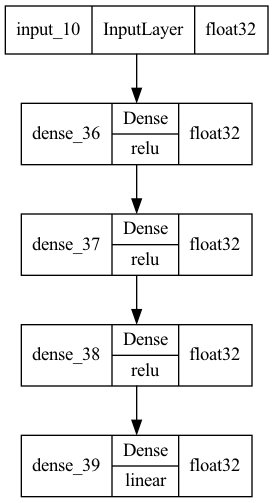

In [350]:
# train the same model, with mse metric
my_model4 = keras.Sequential([
    keras.layers.InputLayer(input_shape=(8,)),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=4)
])

print(my_model4.summary())

plot_model(my_model4, show_dtype=True, show_layer_activations=True)

In [351]:
my_model4.compile(optimizer='adam', 
              loss=tf.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError()])

history4 = my_model4.fit(
    X_train_inst, 
    Y_train_inst,
    batch_size=50,
    epochs=100, 
    verbose=2,
    validation_split=0.15,
    shuffle=False)

Epoch 1/100
10/10 - 1s - loss: 0.0396 - root_mean_squared_error: 0.1989 - val_loss: 0.0320 - val_root_mean_squared_error: 0.1788 - 595ms/epoch - 60ms/step
Epoch 2/100
10/10 - 0s - loss: 0.0294 - root_mean_squared_error: 0.1716 - val_loss: 0.0248 - val_root_mean_squared_error: 0.1575 - 40ms/epoch - 4ms/step
Epoch 3/100
10/10 - 0s - loss: 0.0245 - root_mean_squared_error: 0.1565 - val_loss: 0.0235 - val_root_mean_squared_error: 0.1533 - 41ms/epoch - 4ms/step
Epoch 4/100
10/10 - 0s - loss: 0.0221 - root_mean_squared_error: 0.1487 - val_loss: 0.0219 - val_root_mean_squared_error: 0.1479 - 44ms/epoch - 4ms/step
Epoch 5/100
10/10 - 0s - loss: 0.0202 - root_mean_squared_error: 0.1421 - val_loss: 0.0205 - val_root_mean_squared_error: 0.1433 - 40ms/epoch - 4ms/step
Epoch 6/100
10/10 - 0s - loss: 0.0186 - root_mean_squared_error: 0.1366 - val_loss: 0.0193 - val_root_mean_squared_error: 0.1391 - 40ms/epoch - 4ms/step
Epoch 7/100
10/10 - 0s - loss: 0.0176 - root_mean_squared_error: 0.1328 - val_lo

Epoch 55/100
10/10 - 0s - loss: 0.0100 - root_mean_squared_error: 0.1000 - val_loss: 0.0141 - val_root_mean_squared_error: 0.1188 - 40ms/epoch - 4ms/step
Epoch 56/100
10/10 - 0s - loss: 0.0099 - root_mean_squared_error: 0.0996 - val_loss: 0.0141 - val_root_mean_squared_error: 0.1189 - 40ms/epoch - 4ms/step
Epoch 57/100
10/10 - 0s - loss: 0.0098 - root_mean_squared_error: 0.0992 - val_loss: 0.0141 - val_root_mean_squared_error: 0.1186 - 40ms/epoch - 4ms/step
Epoch 58/100
10/10 - 0s - loss: 0.0098 - root_mean_squared_error: 0.0988 - val_loss: 0.0141 - val_root_mean_squared_error: 0.1187 - 40ms/epoch - 4ms/step
Epoch 59/100
10/10 - 0s - loss: 0.0097 - root_mean_squared_error: 0.0983 - val_loss: 0.0141 - val_root_mean_squared_error: 0.1186 - 41ms/epoch - 4ms/step
Epoch 60/100
10/10 - 0s - loss: 0.0096 - root_mean_squared_error: 0.0980 - val_loss: 0.0141 - val_root_mean_squared_error: 0.1187 - 40ms/epoch - 4ms/step
Epoch 61/100
10/10 - 0s - loss: 0.0095 - root_mean_squared_error: 0.0977 - v

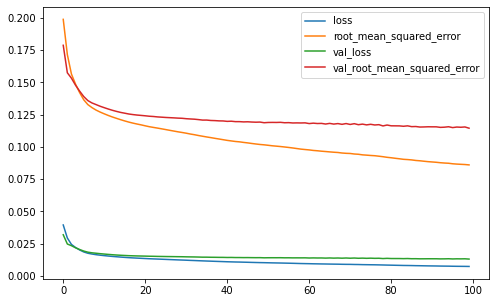

In [352]:
import pandas as pd
pd.DataFrame(history4.history).plot(figsize=(8,5))
plt.show()

9/9 [==============================] - 0s 1ms/step


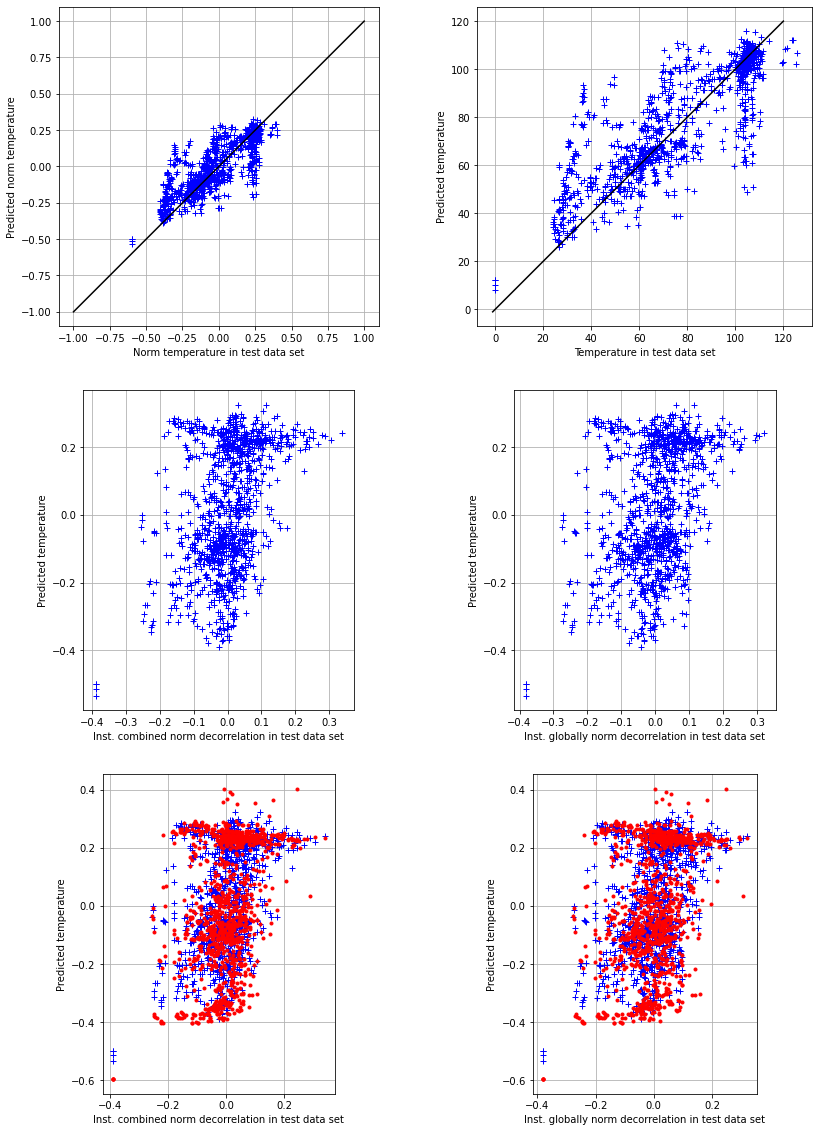

In [353]:
y_predictions_inst = my_model4.predict(X_test_inst)

Y_test_inst_real = (Y_test_inst + temperature_norm_mean) * temperature_4points_max
y_predictions_inst_real = (y_predictions_inst + temperature_norm_mean) * temperature_4points_max
X_test_inst_real = (X_test_inst + dec_log10_mean) * dec_log10_absmax

plt.figure(figsize=(14,20))
plt.subplot(321, aspect='equal')
plt.plot(Y_test_inst, y_predictions_inst, 'b+', np.linspace(-1,1,300), np.linspace(-1,1,300), 'k-');
plt.xlabel('Norm temperature in test data set')
plt.ylabel('Predicted norm temperature')
plt.grid()
plt.subplot(322, aspect='equal')
plt.plot(Y_test_inst_real, y_predictions_inst_real, 'b+', np.linspace(-1,120,300), np.linspace(-1,120,300), 'k-');
plt.xlabel('Temperature in test data set')
plt.ylabel('Predicted temperature')
plt.grid()

plt.subplot(323, aspect='equal')
plt.plot(X_test_inst[:,0:4], y_predictions_inst, 'b+');
plt.xlabel('Inst. combined norm decorrelation in test data set')
plt.ylabel('Predicted temperature')
plt.grid()
plt.subplot(324, aspect='equal')
plt.plot(X_test_inst[:,4:], y_predictions_inst, 'b+');
plt.xlabel('Inst. globally norm decorrelation in test data set')
plt.ylabel('Predicted temperature')
plt.grid()

plt.subplot(325, aspect='equal')
plt.plot(X_test_inst[:,0:4], y_predictions_inst, 'b+', X_test_inst[:,0:4], Y_test_inst, 'r.');
plt.xlabel('Inst. combined norm decorrelation in test data set')
plt.ylabel('Predicted temperature')
plt.grid()
plt.subplot(326, aspect='equal')
plt.plot(X_test_inst[:,4:], y_predictions_inst, 'b+', X_test_inst[:,4:], Y_test_inst, 'r.');
plt.xlabel('Inst. globally norm decorrelation in test data set')
plt.ylabel('Predicted temperature')
plt.grid()

In [355]:
# RMSE in test set in deg celsus
np.sqrt(np.square(Y_test_inst_real-y_predictions_inst_real).mean()) 

15.218309838616133

In [ ]:
# my_model4.save('deep_decorrelation_thermometry_instant_combined_global.h5')

In [362]:
str(Y_test_inst_real[1,])

'[104.075 107.825 103.025  75.1  ]'

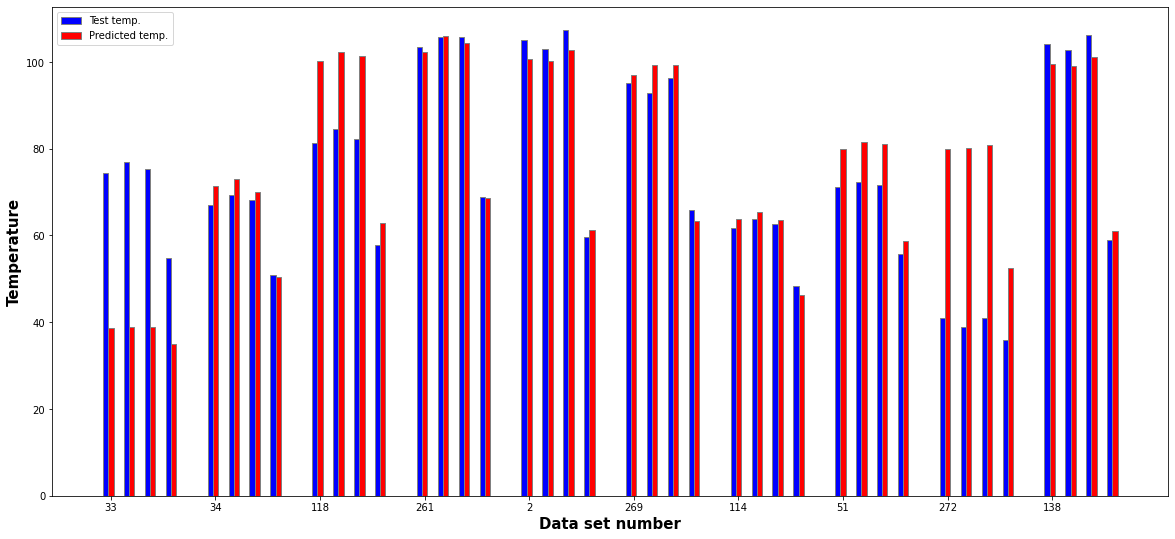

In [394]:
m = 10
thermometers = 4
data_sets_to_disp = np.random.randint(0, Y_test_inst_real.shape[0], m)
barWidth = 0.25
barSeparation = 5

plt.figure(figsize=(20,9))
br1 = np.arange(thermometers)

for i in range(m):
    for j in range(thermometers):
        p1 = plt.bar(br1[j], Y_test_inst_real[data_sets_to_disp[i],j], color ='b', width = barWidth,
            edgecolor ='grey')
        p2 = plt.bar(br1[j]+barWidth, y_predictions_inst_real[data_sets_to_disp[i],j], color ='r', width = barWidth,
            edgecolor ='grey')
    br1 = [x + barSeparation for x in br1]
    
plt.ylabel('Temperature', fontweight ='bold', fontsize = 15)
plt.xlabel('Data set number', fontweight ='bold', fontsize = 15)
plt.xticks([r * barSeparation + barWidth for r in range(m)], [str(y) for y in data_sets_to_disp])
plt.legend((p1[0], p2[0]), ('Test temp.','Predicted temp.'))
plt.show()

In [395]:
a = 33
b = 1
Y_test_inst_real[a,b]-y_predictions_inst_real[a,b]

38.13219731648762

In [432]:
X_test_inst_real[:,0:4] = (X_test_inst[:,0:4] + dec_log10_mean) * dec_log10_absmax
X_test_inst_real[:,4:] = (X_test_inst[:,4:] + dec_global_log10_mean) * dec_global_log10_absmax

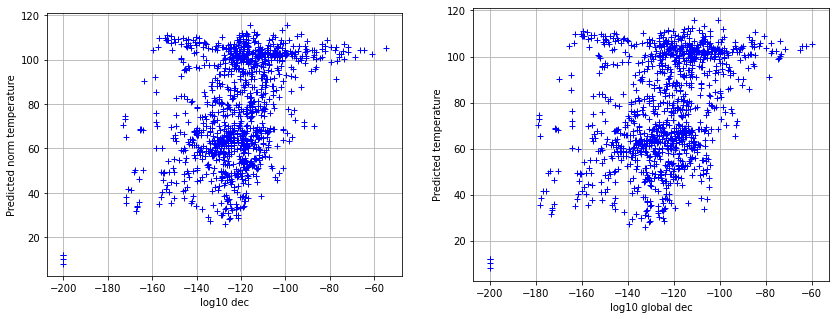

In [435]:
plt.figure(figsize=(14,20))
plt.subplot(121, aspect='equal')
plt.plot(20*X_test_inst_real[:,0:4], y_predictions_inst_real, 'b+');
plt.xlabel('log10 dec')
plt.ylabel('Predicted norm temperature')
plt.grid()
plt.subplot(122, aspect='equal')
plt.plot(20*X_test_inst_real[:,4:], y_predictions_inst_real, 'b+');
plt.xlabel('log10 global dec')
plt.ylabel('Predicted temperature')
plt.grid()

In [431]:
X_test_inst_real.shape

(277, 8)

## Implementing dropout

In [88]:
from datetime import datetime
%reload_ext tensorboard
import tensorboard
tensorboard.__version__

'2.10.0'

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 32)                288       
                                                                 
 dropout_38 (Dropout)        (None, 32)                0         
                                                                 
 dense_67 (Dense)            (None, 64)                2112      
                                                                 
 dropout_39 (Dropout)        (None, 64)                0         
                                                                 
 dense_68 (Dense)            (None, 128)               8320      
                                                                 
 dropout_40 (Dropout)        (None, 128)               0         
                                                                 
 dense_69 (Dense)            (None, 64)              

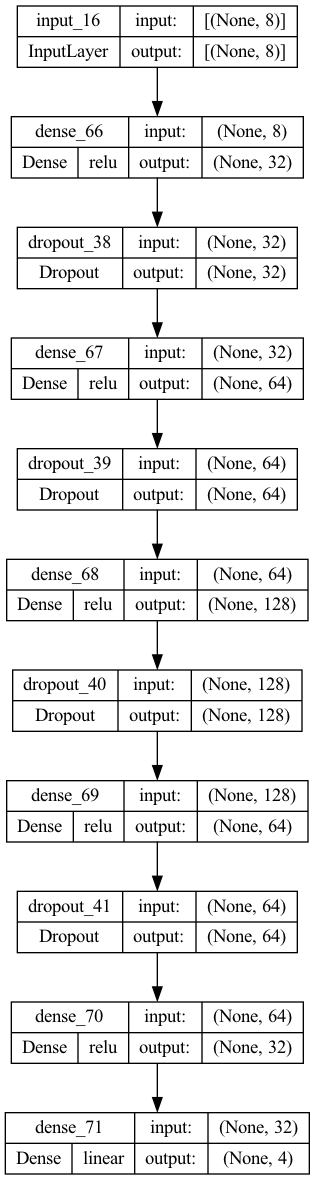

In [110]:
# train the same model, with mse metric
my_model5 = keras.Sequential([
    keras.layers.InputLayer(input_shape=(8,)),
    keras.layers.Dense(units=32, activation='relu', kernel_constraint=keras.constraints.MaxNorm(3)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=64, activation='relu', kernel_constraint=keras.constraints.MaxNorm(3)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=128, activation='relu', kernel_constraint=keras.constraints.MaxNorm(3)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=64, activation='relu', kernel_constraint=keras.constraints.MaxNorm(3)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=32, activation='relu', kernel_constraint=keras.constraints.MaxNorm(3)),
    keras.layers.Dense(units=4)
])

print(my_model5.summary())

plot_model(my_model5, show_shapes=True, show_layer_activations=True)

Epoch 1/420
10/10 - 1s - loss: 0.0339 - root_mean_squared_error: 0.1842 - val_loss: 0.0237 - val_root_mean_squared_error: 0.1540 - 785ms/epoch - 78ms/step
Epoch 2/420
10/10 - 0s - loss: 0.0268 - root_mean_squared_error: 0.1636 - val_loss: 0.0211 - val_root_mean_squared_error: 0.1454 - 43ms/epoch - 4ms/step
Epoch 3/420
10/10 - 0s - loss: 0.0228 - root_mean_squared_error: 0.1510 - val_loss: 0.0202 - val_root_mean_squared_error: 0.1422 - 45ms/epoch - 4ms/step
Epoch 4/420
10/10 - 0s - loss: 0.0209 - root_mean_squared_error: 0.1446 - val_loss: 0.0189 - val_root_mean_squared_error: 0.1374 - 42ms/epoch - 4ms/step
Epoch 5/420
10/10 - 0s - loss: 0.0212 - root_mean_squared_error: 0.1456 - val_loss: 0.0197 - val_root_mean_squared_error: 0.1402 - 40ms/epoch - 4ms/step
Epoch 6/420
10/10 - 0s - loss: 0.0190 - root_mean_squared_error: 0.1380 - val_loss: 0.0193 - val_root_mean_squared_error: 0.1390 - 42ms/epoch - 4ms/step
Epoch 7/420
10/10 - 0s - loss: 0.0189 - root_mean_squared_error: 0.1375 - val_lo

Epoch 55/420
10/10 - 0s - loss: 0.0145 - root_mean_squared_error: 0.1202 - val_loss: 0.0152 - val_root_mean_squared_error: 0.1232 - 33ms/epoch - 3ms/step
Epoch 56/420
10/10 - 0s - loss: 0.0149 - root_mean_squared_error: 0.1222 - val_loss: 0.0163 - val_root_mean_squared_error: 0.1276 - 33ms/epoch - 3ms/step
Epoch 57/420
10/10 - 0s - loss: 0.0150 - root_mean_squared_error: 0.1223 - val_loss: 0.0157 - val_root_mean_squared_error: 0.1252 - 35ms/epoch - 3ms/step
Epoch 58/420
10/10 - 0s - loss: 0.0149 - root_mean_squared_error: 0.1222 - val_loss: 0.0152 - val_root_mean_squared_error: 0.1231 - 35ms/epoch - 3ms/step
Epoch 59/420
10/10 - 0s - loss: 0.0145 - root_mean_squared_error: 0.1206 - val_loss: 0.0171 - val_root_mean_squared_error: 0.1307 - 39ms/epoch - 4ms/step
Epoch 60/420
10/10 - 0s - loss: 0.0136 - root_mean_squared_error: 0.1164 - val_loss: 0.0168 - val_root_mean_squared_error: 0.1297 - 35ms/epoch - 3ms/step
Epoch 61/420
10/10 - 0s - loss: 0.0137 - root_mean_squared_error: 0.1172 - v

Epoch 109/420
10/10 - 0s - loss: 0.0147 - root_mean_squared_error: 0.1214 - val_loss: 0.0162 - val_root_mean_squared_error: 0.1273 - 34ms/epoch - 3ms/step
Epoch 110/420
10/10 - 0s - loss: 0.0148 - root_mean_squared_error: 0.1215 - val_loss: 0.0162 - val_root_mean_squared_error: 0.1274 - 34ms/epoch - 3ms/step
Epoch 111/420
10/10 - 0s - loss: 0.0130 - root_mean_squared_error: 0.1141 - val_loss: 0.0166 - val_root_mean_squared_error: 0.1288 - 38ms/epoch - 4ms/step
Epoch 112/420
10/10 - 0s - loss: 0.0133 - root_mean_squared_error: 0.1152 - val_loss: 0.0160 - val_root_mean_squared_error: 0.1264 - 34ms/epoch - 3ms/step
Epoch 113/420
10/10 - 0s - loss: 0.0135 - root_mean_squared_error: 0.1160 - val_loss: 0.0152 - val_root_mean_squared_error: 0.1233 - 33ms/epoch - 3ms/step
Epoch 114/420
10/10 - 0s - loss: 0.0128 - root_mean_squared_error: 0.1130 - val_loss: 0.0165 - val_root_mean_squared_error: 0.1283 - 38ms/epoch - 4ms/step
Epoch 115/420
10/10 - 0s - loss: 0.0135 - root_mean_squared_error: 0.1

Epoch 162/420
10/10 - 0s - loss: 0.0122 - root_mean_squared_error: 0.1104 - val_loss: 0.0134 - val_root_mean_squared_error: 0.1157 - 33ms/epoch - 3ms/step
Epoch 163/420
10/10 - 0s - loss: 0.0111 - root_mean_squared_error: 0.1054 - val_loss: 0.0134 - val_root_mean_squared_error: 0.1159 - 32ms/epoch - 3ms/step
Epoch 164/420
10/10 - 0s - loss: 0.0120 - root_mean_squared_error: 0.1094 - val_loss: 0.0148 - val_root_mean_squared_error: 0.1215 - 34ms/epoch - 3ms/step
Epoch 165/420
10/10 - 0s - loss: 0.0134 - root_mean_squared_error: 0.1157 - val_loss: 0.0148 - val_root_mean_squared_error: 0.1219 - 33ms/epoch - 3ms/step
Epoch 166/420
10/10 - 0s - loss: 0.0118 - root_mean_squared_error: 0.1087 - val_loss: 0.0147 - val_root_mean_squared_error: 0.1211 - 34ms/epoch - 3ms/step
Epoch 167/420
10/10 - 0s - loss: 0.0121 - root_mean_squared_error: 0.1099 - val_loss: 0.0149 - val_root_mean_squared_error: 0.1222 - 34ms/epoch - 3ms/step
Epoch 168/420
10/10 - 0s - loss: 0.0119 - root_mean_squared_error: 0.1

Epoch 215/420
10/10 - 0s - loss: 0.0113 - root_mean_squared_error: 0.1061 - val_loss: 0.0125 - val_root_mean_squared_error: 0.1118 - 33ms/epoch - 3ms/step
Epoch 216/420
10/10 - 0s - loss: 0.0107 - root_mean_squared_error: 0.1035 - val_loss: 0.0132 - val_root_mean_squared_error: 0.1147 - 34ms/epoch - 3ms/step
Epoch 217/420
10/10 - 0s - loss: 0.0114 - root_mean_squared_error: 0.1066 - val_loss: 0.0140 - val_root_mean_squared_error: 0.1185 - 36ms/epoch - 4ms/step
Epoch 218/420
10/10 - 0s - loss: 0.0129 - root_mean_squared_error: 0.1138 - val_loss: 0.0156 - val_root_mean_squared_error: 0.1247 - 36ms/epoch - 4ms/step
Epoch 219/420
10/10 - 0s - loss: 0.0112 - root_mean_squared_error: 0.1058 - val_loss: 0.0139 - val_root_mean_squared_error: 0.1178 - 37ms/epoch - 4ms/step
Epoch 220/420
10/10 - 0s - loss: 0.0110 - root_mean_squared_error: 0.1049 - val_loss: 0.0139 - val_root_mean_squared_error: 0.1181 - 34ms/epoch - 3ms/step
Epoch 221/420
10/10 - 0s - loss: 0.0112 - root_mean_squared_error: 0.1

Epoch 268/420
10/10 - 0s - loss: 0.0109 - root_mean_squared_error: 0.1044 - val_loss: 0.0146 - val_root_mean_squared_error: 0.1207 - 40ms/epoch - 4ms/step
Epoch 269/420
10/10 - 0s - loss: 0.0111 - root_mean_squared_error: 0.1053 - val_loss: 0.0136 - val_root_mean_squared_error: 0.1164 - 43ms/epoch - 4ms/step
Epoch 270/420
10/10 - 0s - loss: 0.0107 - root_mean_squared_error: 0.1033 - val_loss: 0.0138 - val_root_mean_squared_error: 0.1177 - 45ms/epoch - 4ms/step
Epoch 271/420
10/10 - 0s - loss: 0.0103 - root_mean_squared_error: 0.1016 - val_loss: 0.0141 - val_root_mean_squared_error: 0.1186 - 44ms/epoch - 4ms/step
Epoch 272/420
10/10 - 0s - loss: 0.0107 - root_mean_squared_error: 0.1035 - val_loss: 0.0147 - val_root_mean_squared_error: 0.1211 - 43ms/epoch - 4ms/step
Epoch 273/420
10/10 - 0s - loss: 0.0120 - root_mean_squared_error: 0.1094 - val_loss: 0.0133 - val_root_mean_squared_error: 0.1153 - 45ms/epoch - 4ms/step
Epoch 274/420
10/10 - 0s - loss: 0.0115 - root_mean_squared_error: 0.1

Epoch 321/420
10/10 - 0s - loss: 0.0114 - root_mean_squared_error: 0.1067 - val_loss: 0.0137 - val_root_mean_squared_error: 0.1172 - 39ms/epoch - 4ms/step
Epoch 322/420
10/10 - 0s - loss: 0.0111 - root_mean_squared_error: 0.1056 - val_loss: 0.0144 - val_root_mean_squared_error: 0.1202 - 33ms/epoch - 3ms/step
Epoch 323/420
10/10 - 0s - loss: 0.0117 - root_mean_squared_error: 0.1080 - val_loss: 0.0123 - val_root_mean_squared_error: 0.1109 - 37ms/epoch - 4ms/step
Epoch 324/420
10/10 - 0s - loss: 0.0110 - root_mean_squared_error: 0.1048 - val_loss: 0.0136 - val_root_mean_squared_error: 0.1166 - 37ms/epoch - 4ms/step
Epoch 325/420
10/10 - 0s - loss: 0.0113 - root_mean_squared_error: 0.1061 - val_loss: 0.0134 - val_root_mean_squared_error: 0.1159 - 35ms/epoch - 3ms/step
Epoch 326/420
10/10 - 0s - loss: 0.0103 - root_mean_squared_error: 0.1015 - val_loss: 0.0123 - val_root_mean_squared_error: 0.1108 - 34ms/epoch - 3ms/step
Epoch 327/420
10/10 - 0s - loss: 0.0113 - root_mean_squared_error: 0.1

Epoch 374/420
10/10 - 0s - loss: 0.0114 - root_mean_squared_error: 0.1068 - val_loss: 0.0120 - val_root_mean_squared_error: 0.1096 - 40ms/epoch - 4ms/step
Epoch 375/420
10/10 - 0s - loss: 0.0117 - root_mean_squared_error: 0.1082 - val_loss: 0.0125 - val_root_mean_squared_error: 0.1119 - 42ms/epoch - 4ms/step
Epoch 376/420
10/10 - 0s - loss: 0.0108 - root_mean_squared_error: 0.1039 - val_loss: 0.0131 - val_root_mean_squared_error: 0.1144 - 42ms/epoch - 4ms/step
Epoch 377/420
10/10 - 0s - loss: 0.0116 - root_mean_squared_error: 0.1076 - val_loss: 0.0129 - val_root_mean_squared_error: 0.1134 - 40ms/epoch - 4ms/step
Epoch 378/420
10/10 - 0s - loss: 0.0110 - root_mean_squared_error: 0.1048 - val_loss: 0.0129 - val_root_mean_squared_error: 0.1135 - 39ms/epoch - 4ms/step
Epoch 379/420
10/10 - 0s - loss: 0.0106 - root_mean_squared_error: 0.1030 - val_loss: 0.0122 - val_root_mean_squared_error: 0.1106 - 38ms/epoch - 4ms/step
Epoch 380/420
10/10 - 0s - loss: 0.0104 - root_mean_squared_error: 0.1

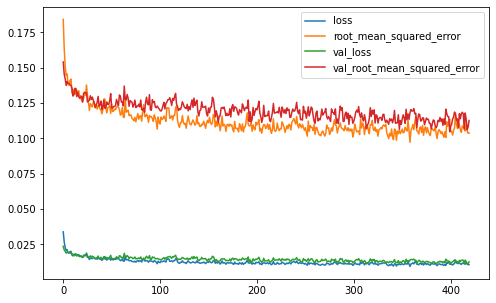

In [111]:
opt = keras.optimizers.Adam(learning_rate=0.01)
my_model5.compile(optimizer=opt, 
              loss=tf.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError()])

logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

history5 = my_model5.fit(
    X_train_inst, 
    Y_train_inst,
    batch_size=50,
    epochs=420, 
    verbose=2,
    validation_split=0.15,
    shuffle=False,
    callbacks=[tensorboard_callback])

import pandas as pd
pd.DataFrame(history5.history).plot(figsize=(8,5))
plt.show()

In [112]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 48786), started 0:50:24 ago. (Use '!kill 48786' to kill it.)

In [113]:
y_predictions_inst = my_model5.predict(X_test_inst)

Y_test_inst_real = (Y_test_inst + temperature_norm_mean) * temperature_4points_max
y_predictions_inst_real = (y_predictions_inst + temperature_norm_mean) * temperature_4points_max
X_test_inst_real = (X_test_inst + dec_log10_mean) * dec_log10_absmax

9/9 [==============================] - 0s 992us/step


14.684750298557056

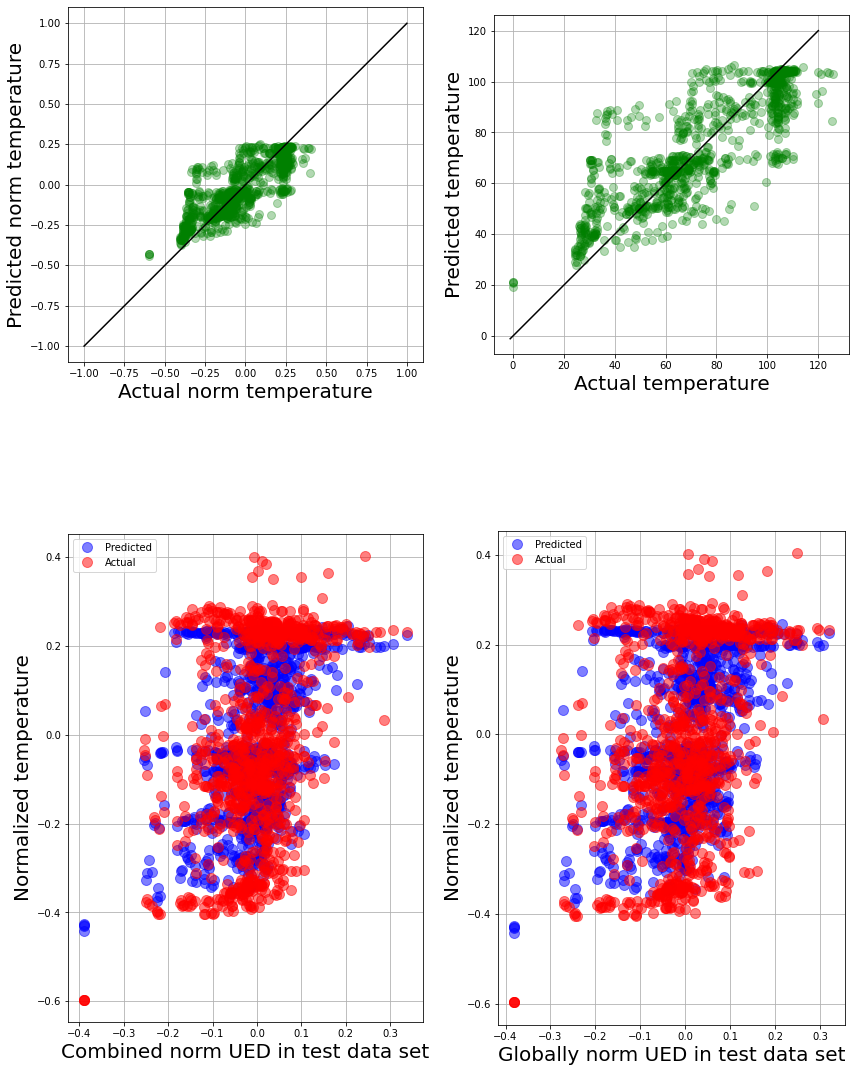

In [125]:
font_size = 20
plt.figure(figsize=(14,20))
plt.subplot(221, aspect='equal')
plt.plot(Y_test_inst, y_predictions_inst, 'go', alpha=0.3, markersize=8);
plt.plot(np.linspace(-1,1,300), np.linspace(-1,1,300), 'k-');
plt.xlabel('Actual norm temperature',fontsize=font_size)
plt.ylabel('Predicted norm temperature',fontsize=font_size)
plt.grid()
plt.subplot(222, aspect='equal')
plt.plot(Y_test_inst_real, y_predictions_inst_real, 'go', alpha=0.3, markersize=8);
plt.plot(np.linspace(-1,120,300), np.linspace(-1,120,300), 'k-');
plt.xlabel('Actual temperature',fontsize=font_size)
plt.ylabel('Predicted temperature',fontsize=font_size)
plt.grid()

# plt.subplot(323, aspect='equal')
# plt.plot(X_test_inst[:,0:4], y_predictions_inst, 'b+');
# plt.xlabel('Inst. combined norm decorrelation in test data set')
# plt.ylabel('Predicted temperature')
# plt.grid()
# plt.subplot(324, aspect='equal')
# plt.plot(X_test_inst[:,4:], y_predictions_inst, 'b+');
# plt.xlabel('Inst. globally norm decorrelation in test data set')
# plt.ylabel('Predicted temperature')
# plt.grid()

plt.subplot(223, aspect='equal')
plt.plot(X_test_inst[:,0:4].ravel(), y_predictions_inst.ravel(), 'bo', label='Predicted', alpha=0.5, markersize=10);
plt.plot(X_test_inst[:,0:4].ravel(), Y_test_inst.ravel(), 'ro', label='Actual', alpha=0.5, markersize=10);
plt.xlabel('Combined norm UED in test data set',fontsize=font_size)
plt.ylabel('Normalized temperature',fontsize=font_size)
plt.grid()
plt.legend(loc='best')
plt.subplot(224, aspect='equal')
plt.plot(X_test_inst[:,4:].ravel(), y_predictions_inst.ravel(), 'bo', label='Predicted', alpha=0.5, markersize=10);
plt.plot(X_test_inst[:,4:].ravel(), Y_test_inst.ravel(), 'ro', label='Actual', alpha=0.5, markersize=10);
plt.xlabel('Globally norm UED in test data set',fontsize=font_size)
plt.ylabel('Normalized temperature',fontsize=font_size)
plt.grid()
plt.legend(loc='best')


# RMSE in test set in deg celsus
np.sqrt(np.square(Y_test_inst_real-y_predictions_inst_real).mean()) 

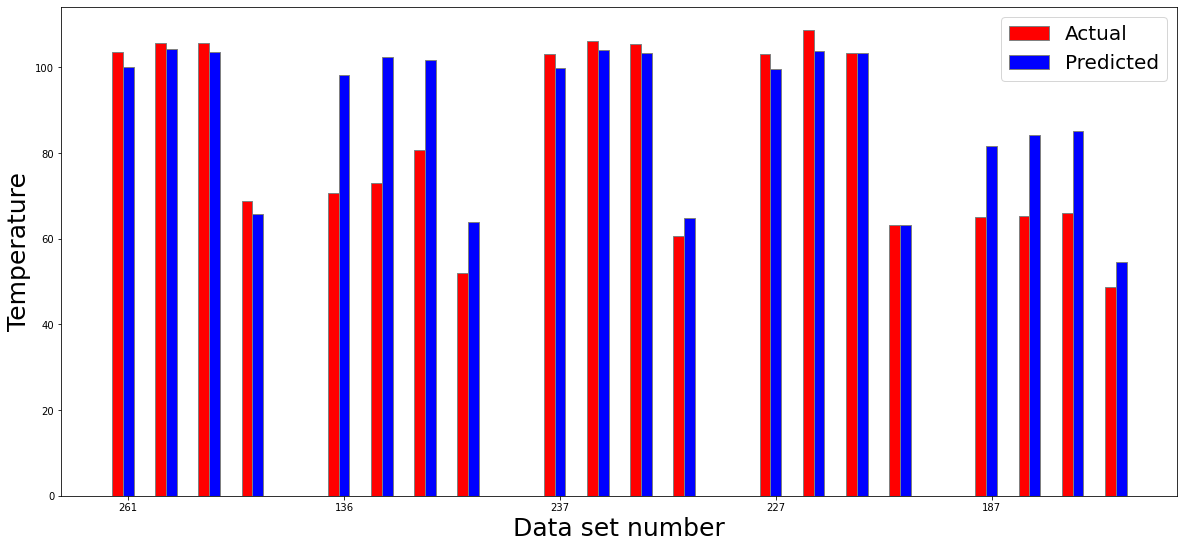

In [115]:
m = 5
thermometers = 4
data_sets_to_disp = np.random.randint(0, Y_test_inst_real.shape[0], m)
barWidth = 0.25
barSeparation = 5

plt.figure(figsize=(20,9))
br1 = np.arange(thermometers)

for i in range(m):
    for j in range(thermometers):
        p1 = plt.bar(br1[j], Y_test_inst_real[data_sets_to_disp[i],j], color ='r', width = barWidth,
            edgecolor ='grey')
        p2 = plt.bar(br1[j]+barWidth, y_predictions_inst_real[data_sets_to_disp[i],j], color ='b', width = barWidth,
            edgecolor ='grey')
    br1 = [x + barSeparation for x in br1]
    
plt.ylabel('Temperature', fontsize=font_size+5)
plt.xlabel('Data set number', fontsize=font_size+5)
plt.xticks([r * barSeparation + barWidth for r in range(m)], [str(y) for y in data_sets_to_disp])
plt.legend((p1[0], p2[0]), ('Actual','Predicted'), fontsize=font_size)
plt.show()

In [63]:
# Compute RMSE for temp < 50, 50< <100, >100

In [132]:
a=my_model5.predict([[0.24236163, 0.26529846, 0.22169166, 0.22320312, 0.24236163, 0.26529846, 0.22169166, 0.22320312]])
a_real = (a + temperature_norm_mean) * temperature_4points_max

1/1 [==============================] - 0s 35ms/step


In [133]:
a_real

array([[102.34033, 106.46964, 105.73071,  67.31979]], dtype=float32)

In [130]:
a=np.array([[1,2,3,4,5,6,7,8]])
a.shape

(1, 8)

In [138]:
Y_train_inst_real = (Y_train_inst + temperature_norm_mean) * temperature_4points_max

In [139]:
np.corrcoef(X_train_inst[:,:4].ravel(),Y_train_inst_real.ravel())

array([[1.        , 0.39946549],
       [0.39946549, 1.        ]])

In [167]:
from sklearn.linear_model import LinearRegression
model_reg = LinearRegression()
delta_log10 = np.nan_to_num(np.log10(dec_4points), posinf=0, neginf=-10)
model_reg.fit(temperature_4points.ravel().reshape(-1,1), delta_log10.ravel().reshape(-1,1))

/var/folders/mq/2m2rd5h112v8vr5mhrwbt3l80000gn/T/ipykernel_47603/1996264017.py:3: RuntimeWarning: divide by zero encountered in log10
  delta_log10 = np.nan_to_num(np.log10(dec_4points), posinf=0, neginf=-10)


LinearRegression()

In [168]:
y_pred_reg = model_reg.intercept_ + model_reg.coef_ * temperature_4points.ravel().reshape(-1,1)

In [169]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(temperature_4points.ravel().reshape(-1,1), y_pred_reg, squared=False)
rms

85.27025155601493

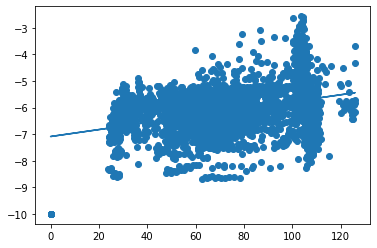

In [170]:
plt.scatter(temperature_4points.ravel(), delta_log10.ravel())
plt.plot(temperature_4points.ravel(), y_pred_reg)

In [172]:
np.corrcoef(Y_test_inst_real.ravel(), y_predictions_inst_real.ravel())

array([[1.        , 0.84082368],
       [0.84082368, 1.        ]])